<a href="https://colab.research.google.com/github/TanushGoel/ChessAI/blob/main/ChessBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.freecodecamp.org/news/improvements-in-deep-q-learning-dueling-double-dqn-prioritized-experience-replay-and-fixed-58b130cc5682/

## GPU/CPU Check

In [ ]:
!nvidia-smi

Wed Jun  2 21:12:05 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

## Play Around With Chess Library

In [ ]:
!pip3 install -q --upgrade --force-reinstall --no-deps chess

     |████████████████████████████████| 153kB 8.4MB/s 


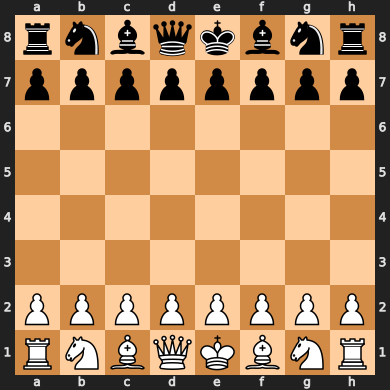

In [ ]:
import chess

board = chess.Board()
board

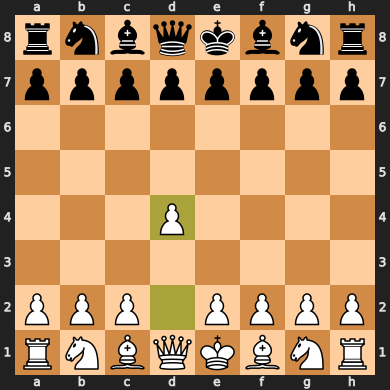

In [ ]:
board.push(chess.Move.from_uci("d2d4"))
board

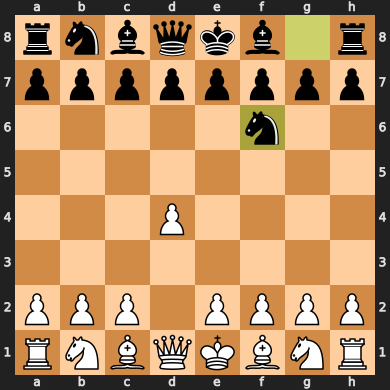

In [ ]:
board.push(chess.Move.from_uci("g8f6"))
board

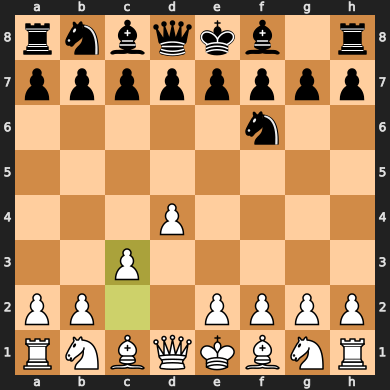

In [ ]:
import numpy as np

legal_moves = list(board.legal_moves)
board.push(np.random.choice(legal_moves))
board

In [ ]:
!wget https://stockfishchess.org/files/stockfish_13_linux_x64.zip
!unzip -q -o stockfish_13_linux_x64.zip

--2021-06-02 21:12:07--  https://stockfishchess.org/files/stockfish_13_linux_x64.zip
Resolving stockfishchess.org (stockfishchess.org)... 104.25.159.9, 172.67.80.249, 104.25.158.9, ...
Connecting to stockfishchess.org (stockfishchess.org)|104.25.159.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12503087 (12M) [application/zip]
Saving to: ‘stockfish_13_linux_x64.zip’

stockfish_13_linux_ 100%[===================>]  11.92M  --.-KB/s    in 0.09s   

2021-06-02 21:12:08 (138 MB/s) - ‘stockfish_13_linux_x64.zip’ saved [12503087/12503087]



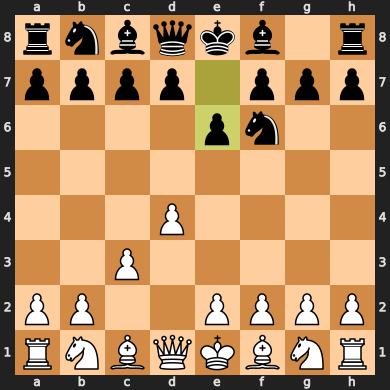

In [ ]:
import chess.engine

board.push(chess.engine.SimpleEngine.popen_uci("stockfish_13_linux_x64/stockfish_13_linux_x64").play(board, limit=chess.engine.Limit(time=1.0)).move)
board

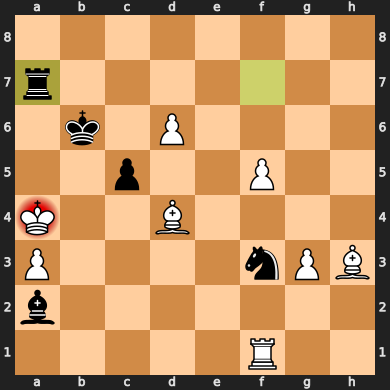

In [ ]:
board.reset()

while True:
    legal_moves = list(board.legal_moves)
    board.push(np.random.choice(legal_moves))
    if board.is_stalemate() or board.is_seventyfive_moves() or board.is_insufficient_material():
        board.reset()
    if board.is_checkmate():
        break

board

## Lichess TV

In [ ]:
from IPython.display import IFrame
IFrame(src="https://lichess.org/tv/frame?theme=brown&bg=dark", width=400, height=440)

## Setup

In [ ]:
moves = []

# knight moves
for i in range(8):
    for j in range(8):
        left = str(j)
        right = str(7-j)
        if left == "0":
            left = ""
        if right == "0":
            right = ""
        fen = left+"N"+right
        whole_fen = ["8"] * 8
        whole_fen[i] = fen
        whole_fen = "/".join(whole_fen)
        whole_fen += " w KQkq - 0 1"
        board = chess.Board(whole_fen)
        moves += [str(x) for x in list(board.legal_moves)]

# queen moves - includes bishop, rook, king, and pawn captures
for i in range(8):
    for j in range(8):
        left = str(j)
        right = str(7-j)
        if left == "0":
            left = ""
        if right == "0":
            right = ""
        fen = left+"Q"+right
        whole_fen = ["8"] * 8
        whole_fen[i] = fen
        whole_fen = "/".join(whole_fen)
        whole_fen += " w KQkq - 0 1"
        board = chess.Board(whole_fen)
        moves += [str(x) for x in list(board.legal_moves)]

# pawn moves - black and white
for i in range(1,7):
    for j in range(8):
        left = str(j)
        right = str(7-j)
        if left == "0":
            left = ""
        if right == "0":
            right = ""
        fen = left+"P"+right
        whole_fen = ["8"] * 8
        whole_fen[i] = fen
        whole_fen = "/".join(whole_fen)
        whole_fen += " w KQkq - 0 1"
        board = chess.Board(whole_fen)
        moves += [str(x) for x in list(board.legal_moves)]

for j in range(8):
    left = str(j)
    right = str(7-j)
    if left == "0":
        left = ""
    if right == "0":
        right = ""
    fen = left+"P"+right
    whole_fen = ["pppppppp"] + ["8"] * 7
    whole_fen[1] = fen
    whole_fen = "/".join(whole_fen)
    whole_fen += " w KQkq - 0 1"
    board = chess.Board(whole_fen)
    moves += [str(x) for x in list(board.legal_moves)]

for i in range(1,7):
    for j in range(8):
        left = str(j)
        right = str(7-j)
        if left == "0":
            left = ""
        if right == "0":
            right = ""
        fen = left+"p"+right
        whole_fen = ["8"] * 8
        whole_fen[i] = fen
        whole_fen = "/".join(whole_fen)
        whole_fen += " w KQkq - 0 1"
        board = chess.Board(whole_fen)
        board.turn = False
        moves += [str(x) for x in list(board.legal_moves)]

for j in range(8):
    left = str(j)
    right = str(7-j)
    if left == "0":
        left = ""
    if right == "0":
        right = ""
    fen = left+"p"+right
    whole_fen = ["8"] * 7 + ["PPPPPPPP"]
    whole_fen[6] = fen
    whole_fen = "/".join(whole_fen)
    whole_fen += " w KQkq - 0 1"
    board = chess.Board(whole_fen)
    board.turn = False
    moves += [str(x) for x in list(board.legal_moves)]

moves = list(set(moves))

num_actions = len(moves) # most will not be real moves
int_to_action = dict(enumerate(moves))
action_to_int = {v: k for k, v in int_to_action.items()}
all_actions = list(action_to_int.keys())

# AlphaZero has an action space of 4672 for comparison - https://ai.stackexchange.com/questions/7979/why-does-the-policy-network-in-alphazero-work
print("Num Actions:", num_actions) # high action space - dueling dqn would perform better 

Num Actions: 1968


In [ ]:
piece_to_val = {"p":1, "P":1, "n":3, "N":3, "b":3, "B":3, "r":5, "R":5, "q":9, "Q":9, "None":0}

square_to_position = dict(zip([chess.square_name(x) for x in range(64)], range(64)))

all_squares = [chess.Square(x) for x in range(64)]

In [ ]:
board.reset()

channels = 5
input_shape = (1, 8, 8, channels)
inp_shape = (channels, 8, 8)
in_shape = (8, 8, channels)
def board_to_array(chess_board):
    
    # board + attack maps (white, black, overlap)
    x = np.zeros(64, dtype="float16") 
    attacked_by_white = []
    attacked_by_black = []
    for pos, square in enumerate(all_squares): 
        piece = chess_board.piece_type_at(pos)
        if piece:
            color = chess_board.color_at(pos)

            col, row = pos % 8, pos // 8
            x[row * 8 + col] = piece if color else -piece

            if color:
                attacked_by_white += list(chess_board.attacks(square))
            else:
                attacked_by_black += list(chess_board.attacks(square))

    y = np.flip(np.array([attacked_by_white.count(i) for i in range(64)], dtype="float16").reshape(8,8), axis=0)
    z = np.flip(np.array([attacked_by_black.count(i) for i in range(64)], dtype="float16").reshape(8,8), axis=0)

    # legal move map
    a = np.zeros(64, dtype="float16")
    for move in [str(i) for i in chess_board.legal_moves]:
        if len(move) == 4:
            a[square_to_position[move[2:]]] += 1
            a[square_to_position[move[:2]]] -= 1

    return np.concatenate([np.flip(x.reshape(8,8), axis=0), y, z, y-z, np.flip(a.reshape(8,8), axis=0)]).reshape(input_shape)

%timeit board_to_array(board)

1000 loops, best of 5: 496 µs per loop


In [ ]:
print(board_to_array(board).reshape(inp_shape)[0])

[[-4. -2. -3. -5. -6. -3. -2. -4.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 4.  2.  3.  5.  6.  3.  2.  4.]]


In [ ]:
print(board_to_array(board).reshape(inp_shape)[1])

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 3. 2. 2. 3. 2. 2.]
 [1. 1. 1. 4. 4. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 0.]]


In [ ]:
print(board_to_array(board).reshape(inp_shape)[2])

[[0. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 4. 4. 1. 1. 1.]
 [2. 2. 3. 2. 2. 3. 2. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
print(board_to_array(board).reshape(inp_shape)[3])

[[ 0. -1. -1. -1. -1. -1. -1.  0.]
 [-1. -1. -1. -4. -4. -1. -1. -1.]
 [-2. -2. -3. -2. -2. -3. -2. -2.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 2.  2.  3.  2.  2.  3.  2.  2.]
 [ 1.  1.  1.  4.  4.  1.  1.  1.]
 [ 0.  1.  1.  1.  1.  1.  1.  0.]]


In [ ]:
print(board_to_array(board).reshape(inp_shape)[4])

[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 2.  1.  2.  1.  1.  2.  1.  2.]
 [-2. -2. -2. -2. -2. -2. -2. -2.]
 [ 0. -2.  0.  0.  0.  0. -2.  0.]]


## Model

In [ ]:
!pip3 install -q tensorflow-addons

     |████████████████████████████████| 686kB 8.7MB/s 


In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
tf.keras.backend.clear_session()

class DuelingDQN(tf.keras.models.Model):

    def __init__(self, num_actions):

        super(DuelingDQN, self).__init__()

        self.rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./6.)

        self.conv1 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation=tfa.activations.mish, kernel_initializer=tf.keras.initializers.VarianceScaling(), bias_initializer=tf.keras.initializers.Zeros())
        self.conv2 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation=tfa.activations.mish, kernel_initializer=tf.keras.initializers.VarianceScaling(), bias_initializer=tf.keras.initializers.Zeros())
        self.conv3 = tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation=tfa.activations.mish, kernel_initializer=tf.keras.initializers.VarianceScaling(), bias_initializer=tf.keras.initializers.Zeros())
        self.conv4 = tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding="same", activation=tfa.activations.mish, kernel_initializer=tf.keras.initializers.VarianceScaling(), bias_initializer=tf.keras.initializers.Zeros())
        self.vec = tf.keras.layers.Flatten()

        self.denseA1 = tf.keras.layers.Dense(units=1024, activation=tfa.activations.mish, kernel_initializer=tf.keras.initializers.VarianceScaling())
        self.dropA1 = tf.keras.layers.Dropout(0.1)
        self.denseA2 = tf.keras.layers.Dense(units=512, activation=tfa.activations.mish, kernel_initializer=tf.keras.initializers.VarianceScaling())
        self.dropA2 = tf.keras.layers.Dropout(0.05)
        self.denseA3 = tf.keras.layers.Dense(units=256, activation=tfa.activations.mish, kernel_initializer=tf.keras.initializers.VarianceScaling())

        self.denseV1 = tf.keras.layers.Dense(units=256, activation=tfa.activations.mish, kernel_initializer=tf.keras.initializers.VarianceScaling())
        self.denseV2 = tf.keras.layers.Dense(units=128, activation=tfa.activations.mish, kernel_initializer=tf.keras.initializers.VarianceScaling())
        self.denseV3 = tf.keras.layers.Dense(units=64, activation=tfa.activations.mish, kernel_initializer=tf.keras.initializers.VarianceScaling())
        self.denseV4 = tf.keras.layers.Dense(units=32, activation=tfa.activations.mish, kernel_initializer=tf.keras.initializers.VarianceScaling())

        self.V = tf.keras.layers.Dense(1)
        self.A = tf.keras.layers.Dense(num_actions)

    @tf.function
    def call(self, states):

        x = self.rescale(states)

        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x) 
        x = self.conv4(x) 

        y = self.vec(x)

        x = self.denseA1(y)
        x = self.dropA1(x)
        x = self.denseA2(x)
        x = self.dropA2(x)
        x = self.denseA3(x)
        A = self.A(x)

        x = self.denseV1(y)
        x = self.denseV2(x)
        x = self.denseV3(x)
        x = self.denseV4(x)
        V = self.V(x)

        Q = tf.add(V, tf.subtract(A, tf.reduce_mean(A, axis=1, keepdims=True))) # V + tf.subtract(A, tf.reduce_mean(A, axis=1, keepdims=True))
        return Q

    def board_activations(self, chess_board):

        x = self.rescale(board_to_array(chess_board))

        x1 = self.conv1(x)
        x2 = self.conv2(x1)
        x3 = self.conv3(x2)
        x4 = self.conv4(x3) 

        return x1, x2, x3, x4

    def get_filters(self, layer_num):

        filters, biases = eval("self.conv"+str(layer_num)).get_weights()

        f_min, f_max = filters.min(), filters.max()
        filters = (filters - f_min) / (f_max - f_min)

        return filters.reshape((1,3,3,-1))

In [ ]:
local_nn = DuelingDQN(num_actions)
target_nn = DuelingDQN(num_actions)

In [ ]:
local_nn.build(input_shape=input_shape)
target_nn.build(input_shape=input_shape)

local_nn.summary()

Model: "dueling_dqn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        multiple                  0         
_________________________________________________________________
conv2d (Conv2D)              multiple                  1472      
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  18496     
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  73856     
_________________________________________________________________
conv2d_3 (Conv2D)            multiple                  295168    
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  

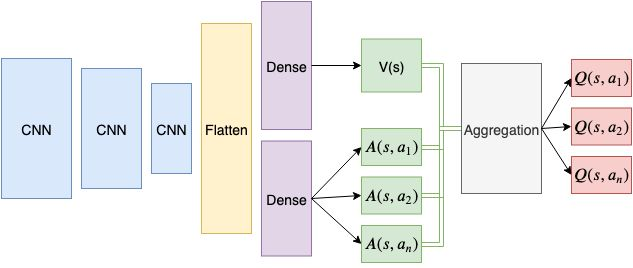

## Loss Function + Optimizer

In [ ]:
optimizer = tf.keras.optimizers.Adam() # lr=1e-5, clipnorm=10.0
loss_fn = tf.keras.losses.Huber() # tf.keras.losses.LogCosh() 

In [ ]:
# check loss - only update when loss stable/converged

def constant(array):

    if len(array) < 5:
        return False

    array = array[-5:]
    if sum([abs(j-i) for i, j in zip(array[:-1], array[1:])]) / len(array) > 0.01:
        return False
    else:
        return True

## Visualize CNN (Untrained) Filters

In [ ]:
import matplotlib.pyplot as plt

filters = local_nn.get_filters(1)

fig = plt.figure(figsize=(32,4))
for img in range(32):
    ax = fig.add_subplot(2, 16, img+1)
    ax = plt.imshow(filters[0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

In [ ]:
filters = local_nn.get_filters(2)

fig = plt.figure(figsize=(32,8))
for img in range(64):
    ax = fig.add_subplot(4, 16, img+1)
    ax = plt.imshow(filters[0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

In [ ]:
filters = local_nn.get_filters(3)

fig = plt.figure(figsize=(32,16))
for img in range(128):
    ax = fig.add_subplot(8, 16, img+1)
    ax = plt.imshow(filters[0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

In [ ]:
filters = local_nn.get_filters(4)

fig = plt.figure(figsize=(32,32))
for img in range(256):
    ax = fig.add_subplot(16, 16, img+1)
    ax = plt.imshow(filters[0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

## Visualize CNN (Untrained) Activations On Starting Position

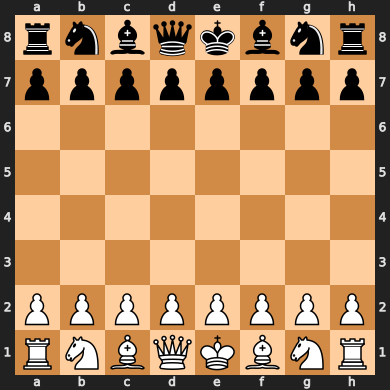

In [ ]:
from IPython.display import display, clear_output

display(board)
activations = local_nn.board_activations(board)

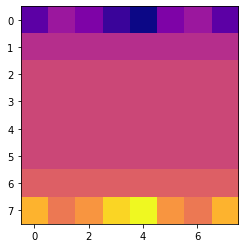

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[0].astype("int16"), cmap='plasma')

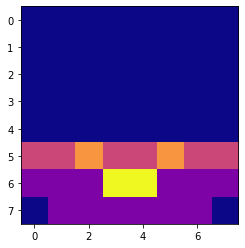

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[1].astype("int16"), cmap='plasma')

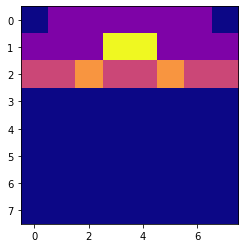

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[2].astype("int16"), cmap='plasma')

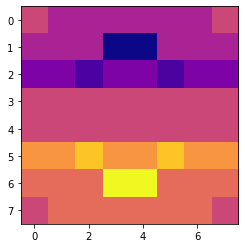

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[3].astype("int16"), cmap='plasma')

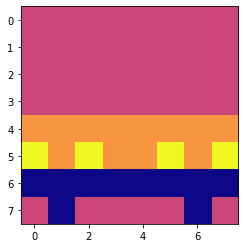

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[4].astype("int16"), cmap='plasma')

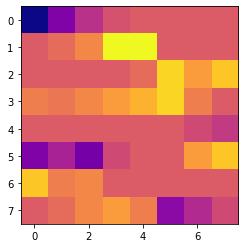

In [ ]:
plt.imshow(np.mean(board_to_array(board)[0].astype("int16"), axis=-1), cmap='plasma')

In [ ]:
fig = plt.figure(figsize=(32,4))
for img in range(32):
    ax = fig.add_subplot(2, 16, img+1)
    ax = plt.imshow(activations[0][0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

In [ ]:
fig = plt.figure(figsize=(32,8))
for img in range(64):
    ax = fig.add_subplot(4, 16, img+1)
    ax = plt.imshow(activations[1][0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

In [ ]:
fig = plt.figure(figsize=(32,16))
for img in range(128):
    ax = fig.add_subplot(8, 16, img+1)
    ax = plt.imshow(activations[2][0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

In [ ]:
fig = plt.figure(figsize=(32,32))
for img in range(256):
    ax = fig.add_subplot(16, 16, img+1)
    ax = plt.imshow(activations[3][0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

## Vizualize CNN (Untrained) Activations On Random Position


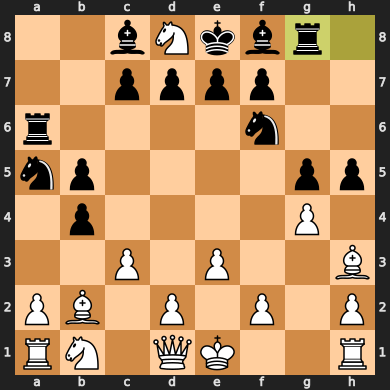

2bNkbr1/2pppp2/r4n2/np4pp/1p4P1/2P1P2B/PB1P1P1P/RN1QK2R w KQ - 1 12


In [ ]:
board.reset()

for i in range(np.random.randint(20,100)):
    legal_moves = list(board.legal_moves)
    board.push(np.random.choice(legal_moves))
    if board.is_checkmate() or board.is_stalemate() or board.is_seventyfive_moves() or board.is_insufficient_material():
        board.reset()

display(board)
print(board.fen())
activations = local_nn.board_activations(board)

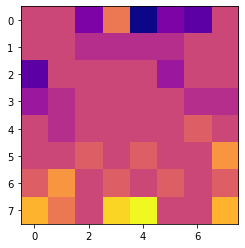

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[0].astype("int16"), cmap='plasma')

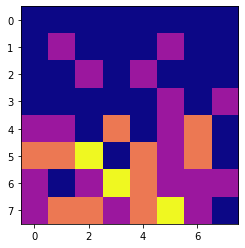

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[1].astype("int16"), cmap='plasma')

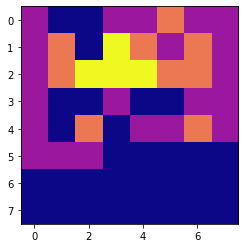

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[2].astype("int16"), cmap='plasma')

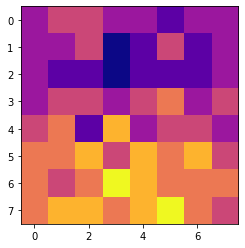

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[3].astype("int16"), cmap='plasma')

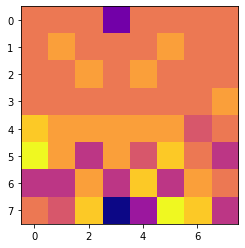

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[4].astype("int16"), cmap='plasma')

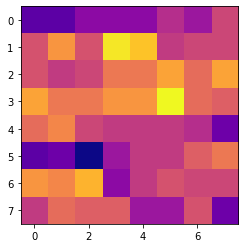

In [ ]:
plt.imshow(np.mean(board_to_array(board)[0].astype("int16"), axis=-1), cmap='plasma')

In [ ]:
fig = plt.figure(figsize=(32,4))
for img in range(32):
    ax = fig.add_subplot(2, 16, img+1)
    ax = plt.imshow(activations[0][0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

In [ ]:
fig = plt.figure(figsize=(32,8))
for img in range(64):
    ax = fig.add_subplot(4, 16, img+1)
    ax = plt.imshow(activations[1][0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

In [ ]:
fig = plt.figure(figsize=(32,16))
for img in range(128):
    ax = fig.add_subplot(8, 16, img+1)
    ax = plt.imshow(activations[2][0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

In [ ]:
fig = plt.figure(figsize=(32,32))
for img in range(256):
    ax = fig.add_subplot(16, 16, img+1)
    ax = plt.imshow(activations[3][0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

## Update Steps

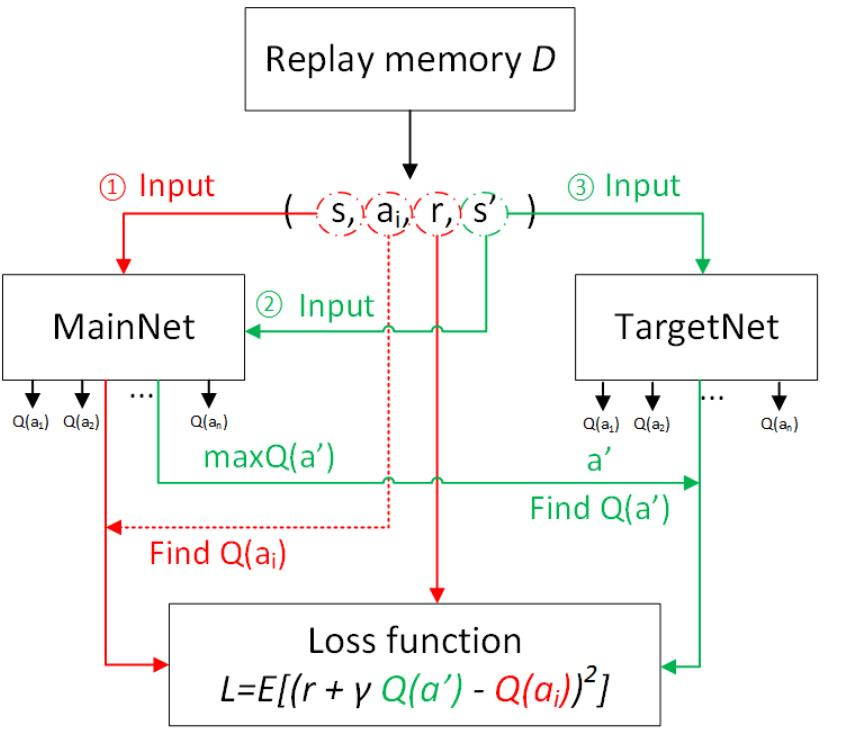

In [ ]:
gamma = 1.0 # 0.99

def train_step(states, actions, rewards, next_states, dones):

    next_qs_local = local_nn(next_states)
    next_qs_argmax = tf.argmax(next_qs_local, axis=-1)
    next_action_mask = tf.one_hot(next_qs_argmax, num_actions)
    next_qs_target = target_nn(next_states)
    masked_next_qs = tf.reduce_sum(next_action_mask * next_qs_target, axis=-1)
    target = rewards + (1. - dones) * gamma * masked_next_qs

    with tf.GradientTape() as tape:
        qs = local_nn(states)
        action_mask = tf.one_hot(actions, num_actions)
        masked_qs = tf.reduce_sum(action_mask * qs, axis=-1)
        loss = loss_fn(target, masked_qs)

    params = local_nn.trainable_variables
    grads = tape.gradient(loss, params)
    optimizer.apply_gradients(zip(grads, params))
    
    return loss

In [ ]:
tau = 0.01
fn = lambda q_weight, target_weight: target_weight * (1-tau) + q_weight * tau

def soft_update_target_network():
    target_nn.set_weights(list(map(fn, local_nn.get_weights(), target_nn.get_weights())))

In [ ]:
def hard_update_target_network():
    target_nn.set_weights(local_nn.get_weights())

hard_update_target_network()

## Experience Replay Buffer

In [ ]:
import os
import random

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

batch_size = 4096
buffer_size = 3000000 # memory: 3000000 samples * 5 channels * 64 digits * 16 bits * 2 (state + next state) + 3000000 samples * 1 digit * 16 bits * 2 (action + reward) + 3000000 samples * 1 bit (bool done) = 30819000000 bits = 3.852375 GB

class ReplayBuffer(object):

    def __init__(self, size):
        self._size = size
        self.buffer = []
        self._next_idx = 0

    def add(self, state, action, reward, next_state, done):
        if self._next_idx >= len(self.buffer):
            self.buffer.append((state, action_to_int[action], reward, next_state, done))
        else:
            self.buffer[self._next_idx] = (state, action_to_int[action], reward, next_state, done)
        self._next_idx = (self._next_idx + 1) % self._size

    def dump(self, states, actions, rewards, next_states, dones):
        for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
            self.add(state, action, reward, next_state, done)

    def __len__(self):
        return len(self.buffer)

    def sample(self, num_samples):
        #states, actions, rewards, next_states, dones = list(zip(*np.take(self.buffer, np.random.choice(len(self.buffer), num_samples), axis=0)))
        states, actions, rewards, next_states, dones = list(zip(*random.sample(self.buffer, num_samples)))
        return np.array(states, dtype="float16"), np.array(actions, dtype='float16'), np.array(rewards, dtype='float16'), np.array(next_states, dtype="float16"), np.array(dones, dtype='float16')

    def get(self, idx):
        return self.buffer[idx]

    def clear(self):
        self.buffer = []
        self._next_idx = 0

    def save(self, path='experience.npy'):
        np.save(path, np.array(self.buffer+[self._next_idx], dtype="object"))

    def load(self, path='experience.npy'):
        if os.path.exists(path):
            self.buffer = list(np.load(path, allow_pickle=True))
            self._next_idx = int(self.buffer[-1])
            self.buffer = self.buffer[:-1]
            if len(self.buffer) >= self._size:
                self.buffer = self.buffer[:self._size] 
                self._next_idx = 0
            print("experience replay buffer loaded with", len(self.buffer), "samples")
        else:
            print("file path", "\""+path+"\"", "for experience replay buffer not found")

buffer = ReplayBuffer(size=buffer_size)

## Flowchart

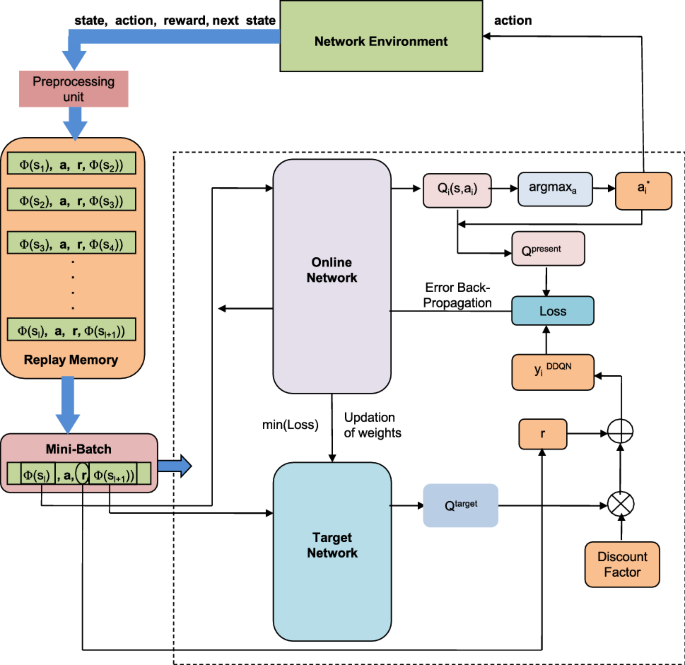

## Load Prior

In [ ]:
from google.colab import drive

drive.mount('/drive') 

In [ ]:
![ -f /drive/MyDrive/chessAI.zip ] && cp -f /drive/MyDrive/chessAI.zip /content

In [ ]:
!ls -sh chessAI.zip

In [ ]:
!unzip -q -o chessAI.zip

In [ ]:
if os.path.exists("chessAI_local.hdf5"):
    local_nn.load_weights("chessAI_local.hdf5") 

if os.path.exists("chessAI_target.hdf5"):
    target_nn.load_weights("chessAI_target.hdf5")

In [ ]:
buffer.load()

## Select Model Action

In [ ]:
def action_qz(chess_board):

  qs = np.squeeze(local_nn(board_to_array(chess_board)))

  qs_actions = dict(zip(action_to_int, qs))

  legals = [str(x) for x in list(chess_board.legal_moves)]
  qs_actions = {k: qs_actions[k] for k in legals}

  return qs_actions

In [ ]:
action_qz(board)

{'a2a3': 0.0064454004,
 'a2a4': 0.0055136266,
 'b1a3': 0.0032257396,
 'b2a3': 0.005735343,
 'b2c1': 0.0039651683,
 'c3b4': 0.0013129688,
 'c3c4': -0.002527261,
 'd1a4': 0.0016180107,
 'd1b3': 0.0030330534,
 'd1c1': 0.0009652601,
 'd1c2': -0.0016739185,
 'd1e2': 0.0038430202,
 'd1f3': 0.0024324087,
 'd2d3': 0.0004266349,
 'd2d4': 0.001890247,
 'd8b7': -0.005360432,
 'd8c6': 0.0018649139,
 'd8e6': 0.005536029,
 'd8f7': -0.00024219719,
 'e1e2': 0.0037096268,
 'e1f1': 0.004760171,
 'e1g1': 0.004493729,
 'e3e4': 0.003869676,
 'f2f3': 0.0037584456,
 'f2f4': 0.0012745272,
 'g4h5': 0.0003414543,
 'h1f1': 0.004073996,
 'h1g1': 0.004330608,
 'h3f1': 0.001511425,
 'h3g2': 0.0027738907}

In [ ]:
def select_epsilon_greedy_action(chess_board, e):

  if np.random.uniform() < e:
    
      return str(np.random.choice(list(chess_board.legal_moves))) # random legal action

  else:
      qs = np.squeeze(local_nn(board_to_array(chess_board)))

      qs_actions = dict(zip(action_to_int, qs))

      legals = [str(x) for x in list(chess_board.legal_moves)]
      qs_actions = {k: qs_actions[k] for k in legals}

      return max(qs_actions, key=qs_actions.get) # greedy action 

In [ ]:
select_epsilon_greedy_action(board, 0)

'a2a3'

In [ ]:
%time select_epsilon_greedy_action(board, 0)

CPU times: user 4.99 ms, sys: 0 ns, total: 4.99 ms
Wall time: 8.76 ms


'a2a3'

In [ ]:
def select_worst_action(chess_board):

  qs = np.squeeze(local_nn(board_to_array(chess_board)))

  qs_actions = dict(zip(action_to_int, qs))

  legals = [str(x) for x in list(chess_board.legal_moves)]
  qs_actions = {k: qs_actions[k] for k in legals}

  return min(qs_actions, key=qs_actions.get) 

## Stockfish #1

In [ ]:
lim = chess.engine.Limit(time=0.2, depth=10)

In [ ]:
stockfish = chess.engine.SimpleEngine.popen_uci("stockfish_13_linux_x64/stockfish_13_linux_x64")
stockfish.configure({"Threads": 2, "Hash": 512, 'Skill Level': 20})

In [ ]:
# semi-fair stockfish --> p bad

def select_stockfish_action(chess_board, n_moves, eps=0.2):

  if n_moves % 2 == 0:
      n_moves += 1

  if np.random.uniform() < eps/n_moves:

      return str(np.random.choice(list(chess_board.legal_moves))) # random legal action

  else:

      analyzed = stockfish.analyse(chess_board, limit=lim, multipv=8) # stockfish move

      moves = [str(x["pv"][0]) for x in analyzed]
      if len(moves) == 1:
          return moves[0]

      scores = np.array([int(str(x['score'].relative).replace("#", "")) for x in analyzed])

      if len(list(set(scores))) == 1:
          return np.random.choice(moves)

      no_neg_scores = [max(score, 0) for score in scores]
      if all(score == 0 for score in no_neg_scores): 
          return moves[np.random.choice(np.where(scores)[0])]

      mates = [x['score'].is_mate() for x in analyzed]
      mate_idxs = np.where(mates)[0]
      if len(mate_idxs) > 0: # if potential mate, mate
          return moves[np.random.choice(mate_idxs)]

      scores = np.divide(no_neg_scores, np.sum(no_neg_scores))

      return np.random.choice(moves, p=scores)

In [ ]:
%time select_stockfish_action(board, 999, 0) 

CPU times: user 32.3 ms, sys: 2.05 ms, total: 34.3 ms
Wall time: 215 ms


'd2d3'

In [ ]:
# op stockfish

def select_stockfish_action_op(chess_board, n_moves, eps=0.2, blunder=0):

  if blunder > 0 and np.random.uniform() < blunder:
      return str(np.random.choice(list(chess_board.legal_moves))) # random legal action

  if n_moves % 2 == 0:
      n_moves += 1
  if np.random.uniform() < eps/n_moves:
      return str(np.random.choice(list(chess_board.legal_moves))) # random legal action to try new openings
  else:
      return str(stockfish.play(chess_board, limit=lim).move) # stockfish move

In [ ]:
%time select_stockfish_action_op(board, 999, 0) 

CPU times: user 2.52 ms, sys: 0 ns, total: 2.52 ms
Wall time: 18.9 ms


'c3b4'

## Komodo

In [ ]:
!wget https://komodochess.com/pub/komodo-12.zip
!unzip -q -o komodo-12.zip

--2021-06-02 21:13:41--  https://komodochess.com/pub/komodo-12.zip
Resolving komodochess.com (komodochess.com)... 165.22.25.249
Connecting to komodochess.com (komodochess.com)|165.22.25.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4229664 (4.0M) [application/zip]
Saving to: ‘komodo-12.zip’

komodo-12.zip       100%[===================>]   4.03M  2.42MB/s    in 1.7s    

2021-06-02 21:13:44 (2.42 MB/s) - ‘komodo-12.zip’ saved [4229664/4229664]



In [ ]:
komodo = chess.engine.SimpleEngine.popen_uci("komodo-12.1.1_5a8fc2/Linux/komodo-12.1.1-linux-bmi2")
komodo.configure({"Threads": 2, "Hash": 512})

In [ ]:
# semi-fair komodo --> p bad

def select_komodo_action(chess_board, n_moves, eps=0.2):

  if n_moves % 2 == 0:
      n_moves += 1

  if np.random.uniform() < eps/n_moves:

      return str(np.random.choice(list(chess_board.legal_moves))) # random legal action

  else:

      analyzed = komodo.analyse(chess_board, limit=lim, multipv=8) # komodo move

      moves = []
      scores = []
      for x in analyzed:
          try:
              moves.append(str(x["pv"][0]))
              scores.append(int(str(x['score'].relative).replace("#", "")))
          except:
              pass

      if len(moves) == 0:
          return select_stockfish_action(chess_board, n_moves) # stockfish as backup

      if len(moves) == 1:
          return moves[0]

      if len(list(set(scores))) == 1:
          return np.random.choice(moves)

      no_neg_scores = [max(score, 0) for score in scores]
      if all(score == 0 for score in no_neg_scores): 
          return moves[np.random.choice(np.where(scores)[0])]

      mates = [x['score'].is_mate() for x in analyzed]
      mate_idxs = np.where(mates)[0]
      if len(mate_idxs) > 0: # if potential mate, mate
          return moves[np.random.choice(mate_idxs)]

      scores = np.divide(no_neg_scores, np.sum(no_neg_scores))

      return np.random.choice(moves, p=scores)

In [ ]:
%time select_komodo_action(board, 999, 0) 

CPU times: user 29.2 ms, sys: 1.94 ms, total: 31.1 ms
Wall time: 382 ms


'h3f1'

In [ ]:
# op komodo

def select_komodo_action_op(chess_board, n_moves, eps=0.2, blunder=0):

  if blunder > 0 and np.random.uniform() < blunder:
      return str(np.random.choice(list(chess_board.legal_moves))) # random legal action

  if n_moves % 2 == 0:
      n_moves += 1
  if np.random.uniform() < eps/n_moves:
      return str(np.random.choice(list(chess_board.legal_moves))) # random legal action to try new openings
  else:
      return str(komodo.play(chess_board, limit=lim).move) # komodo move

In [ ]:
%time select_komodo_action_op(board, 999, 0) 

CPU times: user 6.02 ms, sys: 35 µs, total: 6.05 ms
Wall time: 73.2 ms


'c3b4'

## Create Pre-train Network

In [ ]:
local_nn.layers[:6]

In [ ]:
pretrai_nn = tf.keras.models.Sequential(local_nn.layers[:6])
pretrai_nn.add(tf.keras.layers.Dense(512, activation=tfa.activations.mish))
pretrai_nn.add(tf.keras.layers.Dense(256, activation=tfa.activations.mish))
pretrai_nn.add(tf.keras.layers.Dense(num_actions, activation=tf.keras.activations.relu(max_value=250)))

pretrai_nn.build(input_shape=input_shape)

pretrai_nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (1, 8, 8, 5)              0         
_________________________________________________________________
conv2d (Conv2D)              (1, 8, 8, 32)             1472      
_________________________________________________________________
conv2d_1 (Conv2D)            (1, 8, 8, 64)             18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (1, 8, 8, 128)            73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (1, 8, 8, 256)            295168    
_________________________________________________________________
flatten (Flatten)            (1, 16384)                0         
_________________________________________________________________
dense_18 (Dense)             (1, 512)                  8

In [ ]:
pretrai_nn.compile(optimizer=optimizer, loss="mse")

## Pre-train with Lichess Games

### Download All Lichess Games 

In [ ]:
!sudo apt-get install axel

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  axel
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 56.1 kB of archives.
After this operation, 181 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 axel amd64 2.16.1-1build1 [56.1 kB]
Fetched 56.1 kB in 1s (98.1 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package axel.
(Reading database ... 160772 files and directories currently

In [ ]:
# https://database.lichess.org/
!axel -q -a -n 8 https://database.lichess.org/standard/lichess_db_standard_rated_2015-02.pgn.bz2

In [ ]:
!sudo apt-get install pbzip2

In [ ]:
!pbzip2 -d lichess_db_standard_rated_2015-02.pgn.bz2

### Pre-train on Lichess Elite Games

In [ ]:
!wget -q https://database.nikonoel.fr/lichess_elite_2020-06.zip https://database.nikonoel.fr/lichess_elite_2020-07.zip https://database.nikonoel.fr/lichess_elite_2020-08.zip https://database.nikonoel.fr/lichess_elite_2020-09.zip https://database.nikonoel.fr/lichess_elite_2020-10.zip https://database.nikonoel.fr/lichess_elite_2020-11.zip https://database.nikonoel.fr/lichess_elite_2020-12.zip https://database.nikonoel.fr/lichess_elite_2021-01.zip https://database.nikonoel.fr/lichess_elite_2021-02.zip https://database.nikonoel.fr/lichess_elite_2021-03.zip https://database.nikonoel.fr/lichess_elite_2021-04.zip

In [ ]:
!for z in lichess_elite_2020-06.zip lichess_elite_2020-07.zip lichess_elite_2020-08.zip lichess_elite_2020-09.zip lichess_elite_2020-10.zip lichess_elite_2020-11.zip lichess_elite_2020-12.zip lichess_elite_2021-01.zip lichess_elite_2021-02.zip lichess_elite_2021-03.zip lichess_elite_2021-04.zip; do unzip -q -o $z; done

In [ ]:
games = []
for pgn in ["lichess_elite_2020-06.pgn", "lichess_elite_2020-07.pgn", "lichess_elite_2020-08.pgn", "lichess_elite_2020-09.pgn", "lichess_elite_2020-10.pgn", "lichess_elite_2020-11.pgn", "lichess_elite_2020-12.pgn", "lichess_elite_2021-01.pgn", "lichess_elite_2021-02.pgn", "lichess_elite_2021-03.pgn", "lichess_elite_2021-04.pgn"]:
    games += open(pgn, encoding="utf-8").read().split("\n\n")[1::2]

len(games)

5245776

In [ ]:
stockfish.close()
stockfish = chess.engine.SimpleEngine.popen_uci("stockfish_13_linux_x64/stockfish_13_linux_x64")
stockfish.configure({"Threads": 2, "Hash": 512, 'Skill Level': 20})

In [ ]:
losses = []
Xs = []
ys = []

for game_num in range(len(games)):

    board.reset()

    try:
        for move in games[game_num].split():

            if not move[0].isdigit():

                board.push_san(move)
                m = str(board.pop())

                engine_move = action_to_int[str(stockfish.play(board, limit=lim).move)] # action_to_int[str(komodo.play(board, limit=lim).move)]
                player_move = action_to_int[m]

                vec = [0]*num_actions
                for m in [action_to_int[str(x)] for x in list(board.legal_moves)]:
                    vec[m] = 5
                vec[player_move] = 25
                vec[engine_move] = 250

                ys.append(vec)
                Xs.append(board_to_array(board).reshape(in_shape))

                if len(ys) % 24576 == 0:
                    loss = pretrai_nn.fit(np.array(Xs), np.array(ys), batch_size=256, shuffle=True, verbose=0).history["loss"][0]
                    losses.append(loss)

                    print(loss)

                    Xs, ys = [], []

                board.push_san(move)

    except:
        print("bad game")

In [ ]:
game_num

In [ ]:
plt.plot(losses)

In [ ]:
del Xs, ys, losses, games

In [ ]:
def pretrain_move(chess_board):

  qs = np.squeeze(pretrai_nn(board_to_array(chess_board)))

  qs_actions = dict(zip(action_to_int, qs))

  legals = [str(x) for x in list(chess_board.legal_moves)]
  qs_actions = {k: qs_actions[k] for k in legals}

  return max(qs_actions, key=qs_actions.get)

## Visualize CNN (Pre-trained) Activations On Starting Position

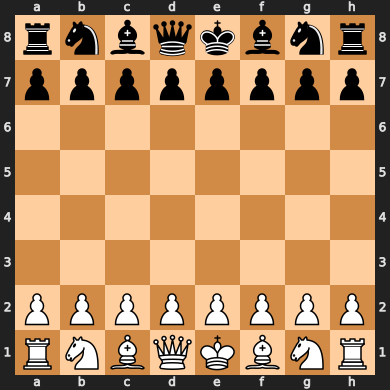

In [ ]:
board.reset()
display(board)
activations = local_nn.board_activations(board)

In [ ]:
pretrain_move(board)

'b1c3'

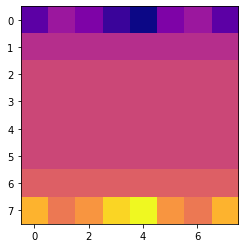

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[0].astype("int16"), cmap='plasma')

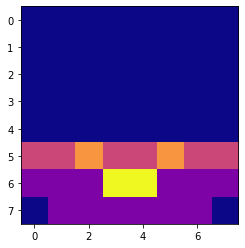

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[1].astype("int16"), cmap='plasma')

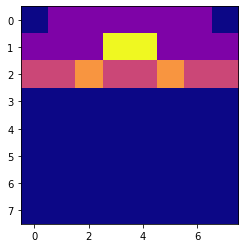

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[2].astype("int16"), cmap='plasma')

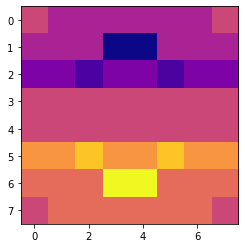

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[3].astype("int16"), cmap='plasma')

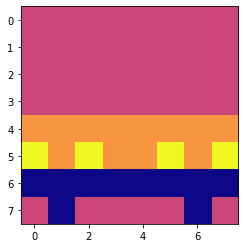

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[4].astype("int16"), cmap='plasma')

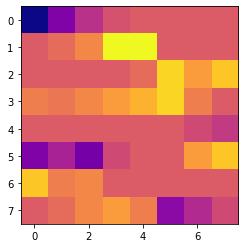

In [ ]:
plt.imshow(np.mean(board_to_array(board)[0].astype("int16"), axis=-1), cmap='plasma')

In [ ]:
fig = plt.figure(figsize=(32,4))
for img in range(32):
    ax = fig.add_subplot(2, 16, img+1)
    ax = plt.imshow(activations[0][0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

In [ ]:
fig = plt.figure(figsize=(32,8))
for img in range(64):
    ax = fig.add_subplot(4, 16, img+1)
    ax = plt.imshow(activations[1][0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

In [ ]:
fig = plt.figure(figsize=(32,16))
for img in range(128):
    ax = fig.add_subplot(8, 16, img+1)
    ax = plt.imshow(activations[2][0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

In [ ]:
fig = plt.figure(figsize=(32,32))
for img in range(256):
    ax = fig.add_subplot(16, 16, img+1)
    ax = plt.imshow(activations[3][0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

## Visualize CNN (Pre-trained) Activations On Random Position

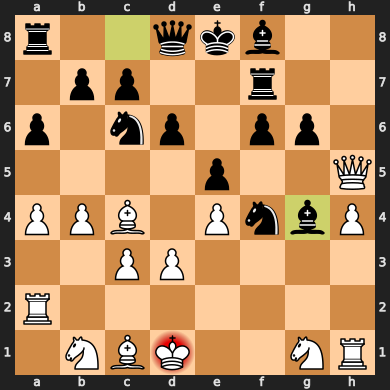

r2qkb2/1pp2r2/p1np1pp1/4p2Q/PPB1PnbP/2PP4/R7/1NBK2NR w q - 0 19


In [ ]:
board.reset()

for i in range(np.random.randint(10,50)):
    legal_moves = list(board.legal_moves)
    board.push(np.random.choice(legal_moves))
    if board.is_checkmate() or board.is_stalemate() or board.is_seventyfive_moves() or board.is_insufficient_material():
        board.reset()

display(board)
print(board.fen())
activations = local_nn.board_activations(board)

In [ ]:
pretrain_move(board)

'd1d2'

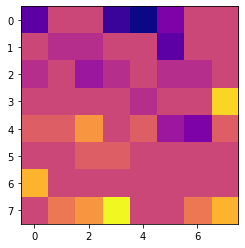

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[0].astype("int16"), cmap='plasma')

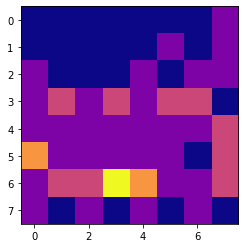

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[1].astype("int16"), cmap='plasma')

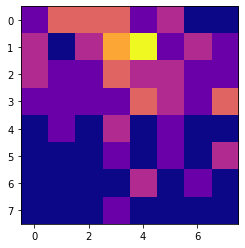

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[2].astype("int16"), cmap='plasma')

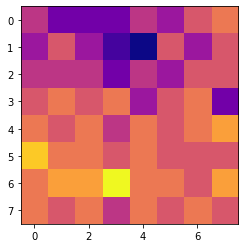

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[3].astype("int16"), cmap='plasma')

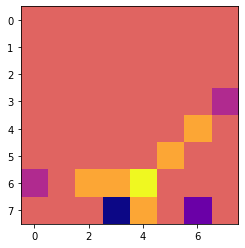

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[4].astype("int16"), cmap='plasma')

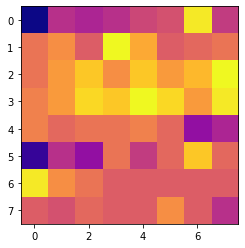

In [ ]:
plt.imshow(np.mean(board_to_array(board)[0].astype("int16"), axis=-1), cmap='plasma')

In [ ]:
fig = plt.figure(figsize=(32,4))
for img in range(32):
    ax = fig.add_subplot(2, 16, img+1)
    ax = plt.imshow(activations[0][0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

In [ ]:
fig = plt.figure(figsize=(32,8))
for img in range(64):
    ax = fig.add_subplot(4, 16, img+1)
    ax = plt.imshow(activations[1][0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

In [ ]:
fig = plt.figure(figsize=(32,16))
for img in range(128):
    ax = fig.add_subplot(8, 16, img+1)
    ax = plt.imshow(activations[2][0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

In [ ]:
fig = plt.figure(figsize=(32,32))
for img in range(256):
    ax = fig.add_subplot(16, 16, img+1)
    ax = plt.imshow(activations[3][0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

## Play Pre-trained Model

In [ ]:
play_board = chess.Board()

def play_white():

    play_board.reset()
    display(play_board)

    while True:

        print("pick a move:")
        move = str(input())

        while move not in [str(x) for x in list(play_board.legal_moves)]:
            print("move invalid \npick a move:")
            move = str(input())
        
        #clear_output()
        play_board.push(chess.Move.from_uci(move))
        display(play_board)

        if play_board.is_checkmate() or play_board.is_stalemate() or play_board.is_seventyfive_moves() or play_board.is_insufficient_material():
            break

        move = pretrain_move(play_board)

        print("chessAI picked:", move)
                
        #clear_output()
        play_board.push(chess.Move.from_uci(move))
        display(play_board)

        if play_board.is_checkmate() or play_board.is_stalemate() or play_board.is_seventyfive_moves() or play_board.is_insufficient_material():
            break

    print("GAME OVER")

def play_black():

    play_board.reset()
    display(play_board)

    while True:

        move = pretrain_move(play_board)

        print("chessAI picked:", move)
                
        #clear_output()
        play_board.push(chess.Move.from_uci(move))
        display(play_board)

        if play_board.is_checkmate() or play_board.is_stalemate() or play_board.is_seventyfive_moves() or play_board.is_insufficient_material():
            break

        print("pick a move:")
        move = str(input())

        while move not in [str(x) for x in list(play_board.legal_moves)]:
            print("move invalid \npick a move:")
            move = str(input())

        #clear_output()
        play_board.push(chess.Move.from_uci(move))
        display(play_board)

        if play_board.is_checkmate() or play_board.is_stalemate() or play_board.is_seventyfive_moves() or play_board.is_insufficient_material():
            break

    print("GAME OVER")

def play():

    print("what color would you like to play as? (white/w/black/b)")
    play_color = str(input())

    while play_color not in ["white", "w", "black", "b"]:
        print("invalid color \nwhat color would you like to play as? (white/w/black/b)")
        play_color = str(input())

    if play_color == "white" or "w":
        play_white()
    else:
        play_black()

In [ ]:
play()

## Opponent

In [ ]:
# random vs op

num_episodes = 250000

for episode in range(1, num_episodes+1):

    board.reset()
    state = board_to_array(board)

    rand_turn = bool(np.random.randint(2))

    episode_states_black, episode_actions_black, episode_rewards_black, episode_next_states_black, episode_dones_black = [], [], [], [], []
    episode_states_white, episode_actions_white, episode_rewards_white, episode_next_states_white, episode_dones_white = [], [], [], [], []

    done = False
    total_moves = 0

    while not done:

        white_turn = board.turn

        if rand_turn:
            action = str(np.random.choice(list(board.legal_moves)))
            rand_turn = False
        else:
            action = select_stockfish_action_op(board, total_moves) # select_komodo_action_op(board, total_moves)
            rand_turn = True

        total_moves += 1
        reward = 0

        if board.is_capture(chess.Move.from_uci(action)):
            pos = square_to_position[action[2:4]]
            piece = str(board.piece_at(pos))
            reward += piece_to_val[piece]
            if white_turn:
                episode_rewards_black[-1] -= piece_to_val[piece]
            else:
                episode_rewards_white[-1] -= piece_to_val[piece]

        if len(action) > 4: # promotion
            reward += piece_to_val[action[-1]]
            if white_turn:
                episode_rewards_black[-1] -= piece_to_val[action[-1]]
            else:
                episode_rewards_white[-1] -= piece_to_val[action[-1]]

        board.push(chess.Move.from_uci(action))
        if episode % 100 == 0:
            display(board)

        if board.is_checkmate():
            reward += 100
            done = True
            if white_turn:
                episode_rewards_black[-1] -= 100
                episode_dones_black[-1] = True
            else:
                episode_rewards_white[-1] -= 100
                episode_dones_white[-1] = True

        if board.is_stalemate() or board.is_seventyfive_moves() or board.is_insufficient_material():
            reward -= 25
            done = True
            if white_turn:
                episode_rewards_black[-1] -= 25
                episode_dones_black[-1] = True
            else:
                episode_rewards_white[-1] -= 25
                episode_dones_white[-1] = True

        if board.is_check():
            reward += 0.1
            if white_turn:
                episode_rewards_black[-1] -= 0.1
            else:
                episode_rewards_white[-1] -= 0.1

        if white_turn:

            episode_states_white.append(state)
            episode_actions_white.append(action)
            episode_rewards_white.append(reward)
            episode_dones_white.append(done)

            state = board_to_array(board)

            if len(episode_states_black) > len(episode_next_states_black):
                episode_next_states_black.append(state)

            if done:
                episode_next_states_white.append(state) 

        else:

            episode_states_black.append(state)
            episode_actions_black.append(action)
            episode_rewards_black.append(reward) 
            episode_dones_black.append(done)

            state = board_to_array(board)

            episode_next_states_white.append(state)

            if done:
                episode_next_states_black.append(state) 

    buffer.dump(episode_states_white, episode_actions_white, episode_rewards_white, episode_next_states_white, episode_dones_white)
    buffer.dump(episode_states_black, episode_actions_black, episode_rewards_black, episode_next_states_black, episode_dones_black)

    if episode % 10 == 0:
        print("episode:", str(episode)+"/"+str(num_episodes), "num moves:", total_moves, "buffer:", len(buffer))
    
    if (episode+1) % 100 == 0:
        clear_output()

In [ ]:
# fair vs op

num_episodes = 100000

for episode in range(1, num_episodes+1):

    board.reset()
    state = board_to_array(board)

    fair_turn = bool(np.random.randint(2))

    episode_states_black, episode_actions_black, episode_rewards_black, episode_next_states_black, episode_dones_black = [], [], [], [], []
    episode_states_white, episode_actions_white, episode_rewards_white, episode_next_states_white, episode_dones_white = [], [], [], [], []

    done = False
    total_moves = 0

    while not done:

        white_turn = board.turn

        if fair_turn:
            action = select_stockfish_action(board, total_moves) # select_komodo_action(board, total_moves) 
            fair_turn = False
        else:
            action = select_stockfish_action_op(board, total_moves) # select_komodo_action_op(board, total_moves) 
            fair_turn = True

        total_moves += 1
        reward = 0

        if board.is_capture(chess.Move.from_uci(action)):
            pos = square_to_position[action[2:4]]
            piece = str(board.piece_at(pos))
            reward += piece_to_val[piece]
            if white_turn:
                episode_rewards_black[-1] -= piece_to_val[piece]
            else:
                episode_rewards_white[-1] -= piece_to_val[piece]

        if len(action) > 4: # promotion
            reward += piece_to_val[action[-1]]
            if white_turn:
                episode_rewards_black[-1] -= piece_to_val[action[-1]]
            else:
                episode_rewards_white[-1] -= piece_to_val[action[-1]]

        board.push(chess.Move.from_uci(action))
        if episode % 100 == 0:
            display(board)

        if board.is_checkmate():
            reward += 100
            done = True
            if white_turn:
                episode_rewards_black[-1] -= 100
                episode_dones_black[-1] = True
            else:
                episode_rewards_white[-1] -= 100
                episode_dones_white[-1] = True

        if board.is_stalemate() or board.is_seventyfive_moves() or board.is_insufficient_material():
            reward -= 25
            done = True
            if white_turn:
                episode_rewards_black[-1] -= 25
                episode_dones_black[-1] = True
            else:
                episode_rewards_white[-1] -= 25
                episode_dones_white[-1] = True

        if board.is_check():
            reward += 0.1
            if white_turn:
                episode_rewards_black[-1] -= 0.1
            else:
                episode_rewards_white[-1] -= 0.1

        if white_turn:

            episode_states_white.append(state)
            episode_actions_white.append(action)
            episode_rewards_white.append(reward)
            episode_dones_white.append(done)

            state = board_to_array(board)

            if len(episode_states_black) > len(episode_next_states_black):
                episode_next_states_black.append(state)

            if done:
                episode_next_states_white.append(state) 

        else:

            episode_states_black.append(state)
            episode_actions_black.append(action)
            episode_rewards_black.append(reward) 
            episode_dones_black.append(done)

            state = board_to_array(board)

            episode_next_states_white.append(state)

            if done:
                episode_next_states_black.append(state) 

    buffer.dump(episode_states_white, episode_actions_white, episode_rewards_white, episode_next_states_white, episode_dones_white)
    buffer.dump(episode_states_black, episode_actions_black, episode_rewards_black, episode_next_states_black, episode_dones_black)

    if episode % 10 == 0:
        print("episode:", str(episode)+"/"+str(num_episodes), "num moves:", total_moves, "buffer:", len(buffer))
    
    if (episode+1) % 100 == 0:
        clear_output()

In [ ]:
# op vs op

num_episodes = 20000

for episode in range(1, num_episodes+1):

    board.reset()
    state = board_to_array(board)

    op1_turn = bool(np.random.randint(2))

    episode_states_black, episode_actions_black, episode_rewards_black, episode_next_states_black, episode_dones_black = [], [], [], [], []
    episode_states_white, episode_actions_white, episode_rewards_white, episode_next_states_white, episode_dones_white = [], [], [], [], []

    done = False
    total_moves = 0

    if np.random.uniform() < 0.25: # 1.0
        blunder_rate = 0
    else:
        blunder_rate = np.random.uniform(0, 0.05)

    while not done:

        white_turn = board.turn

        if op1_turn:
            action = select_stockfish_action_op(board, total_moves, 0.5, blunder_rate) 
            op1_turn = False
        else:
            action = select_komodo_action_op(board, total_moves, 0.5, blunder_rate) 
            op1_turn = True

        total_moves += 1
        reward = 0

        if board.is_capture(chess.Move.from_uci(action)):
            pos = square_to_position[action[2:4]]
            piece = str(board.piece_at(pos))
            reward += piece_to_val[piece]
            if white_turn:
                episode_rewards_black[-1] -= piece_to_val[piece]
            else:
                episode_rewards_white[-1] -= piece_to_val[piece]

        if len(action) > 4: # promotion
            reward += piece_to_val[action[-1]]
            if white_turn:
                episode_rewards_black[-1] -= piece_to_val[action[-1]]
            else:
                episode_rewards_white[-1] -= piece_to_val[action[-1]]

        board.push(chess.Move.from_uci(action))
        if episode % 100 == 0:
            display(board)

        if board.is_checkmate():
            if op1_turn:
                print("CHECKMATE! KOMODO WINS")
            else:
                print("CHECKMATE! STOCKFISH WINS")
            reward += 100
            done = True
            if white_turn:
                episode_rewards_black[-1] -= 100
                episode_dones_black[-1] = True
            else:
                episode_rewards_white[-1] -= 100
                episode_dones_white[-1] = True

        if board.is_stalemate() or board.is_seventyfive_moves() or board.is_insufficient_material():
            reward -= 25
            done = True
            if white_turn:
                episode_rewards_black[-1] -= 25
                episode_dones_black[-1] = True
            else:
                episode_rewards_white[-1] -= 25
                episode_dones_white[-1] = True

        if board.is_check():
            reward += 0.1
            if white_turn:
                episode_rewards_black[-1] -= 0.1
            else:
                episode_rewards_white[-1] -= 0.1

        if white_turn:

            episode_states_white.append(state)
            episode_actions_white.append(action)
            episode_rewards_white.append(reward)
            episode_dones_white.append(done)

            state = board_to_array(board)

            if len(episode_states_black) > len(episode_next_states_black):
                episode_next_states_black.append(state)

            if done:
                episode_next_states_white.append(state) 

        else:

            episode_states_black.append(state)
            episode_actions_black.append(action)
            episode_rewards_black.append(reward) 
            episode_dones_black.append(done)

            state = board_to_array(board)

            episode_next_states_white.append(state)

            if done:
                episode_next_states_black.append(state) 

    buffer.dump(episode_states_white, episode_actions_white, episode_rewards_white, episode_next_states_white, episode_dones_white)
    buffer.dump(episode_states_black, episode_actions_black, episode_rewards_black, episode_next_states_black, episode_dones_black)

    if episode % 10 == 0:
        print("episode:", str(episode)+"/"+str(num_episodes), "num moves:", total_moves, "buffer:", len(buffer))
    
    if (episode+1) % 100 == 0:
        clear_output()

In [ ]:
# play against fair

num_episodes = 50000

epsilon = 0.5
eps_decay = 1.00005

loss = np.inf
losses = []
t_updates = 0
l_updates = 0
delta_lt = 0
delta_buffer = 0
delta_buffer_thresh = batch_size//8
for episode in range(1, num_episodes+1):

    board.reset()
    state = board_to_array(board)

    fair_turn = bool(np.random.randint(2))

    episode_states_black, episode_actions_black, episode_rewards_black, episode_next_states_black, episode_dones_black = [], [], [], [], []
    episode_states_white, episode_actions_white, episode_rewards_white, episode_next_states_white, episode_dones_white = [], [], [], [], []

    done = False
    total_moves = 0

    while not done:

        white_turn = board.turn

        if fair_turn:
            action = select_stockfish_action(board, total_moves) # select_komodo_action(board, total_moves) 
            fair_turn = False
        else:
            action = select_epsilon_greedy_action(board, epsilon)
            fair_turn = True

        total_moves += 1
        reward = 0

        if board.is_capture(chess.Move.from_uci(action)):
            pos = square_to_position[action[2:4]]
            piece = str(board.piece_at(pos))
            reward += piece_to_val[piece]
            if white_turn:
                episode_rewards_black[-1] -= piece_to_val[piece]
            else:
                episode_rewards_white[-1] -= piece_to_val[piece]

        if len(action) > 4: # promotion
            reward += piece_to_val[action[-1]]
            if white_turn:
                episode_rewards_black[-1] -= piece_to_val[action[-1]]
            else:
                episode_rewards_white[-1] -= piece_to_val[action[-1]]

        board.push(chess.Move.from_uci(action))
        if episode % 100 == 0:
            display(board)

        if board.is_checkmate():
            reward += 100
            done = True
            if white_turn:
                episode_rewards_black[-1] -= 100
                episode_dones_black[-1] = True
            else:
                episode_rewards_white[-1] -= 100
                episode_dones_white[-1] = True

        if board.is_stalemate() or board.is_seventyfive_moves() or board.is_insufficient_material():
            reward -= 25
            done = True
            if white_turn:
                episode_rewards_black[-1] -= 25
                episode_dones_black[-1] = True
            else:
                episode_rewards_white[-1] -= 25
                episode_dones_white[-1] = True

        if board.is_check():
            reward += 0.1
            if white_turn:
                episode_rewards_black[-1] -= 0.1
            else:
                episode_rewards_white[-1] -= 0.1

        if white_turn:

            episode_states_white.append(state)
            episode_actions_white.append(action)
            episode_rewards_white.append(reward)
            episode_dones_white.append(done)

            state = board_to_array(board)

            if len(episode_states_black) > len(episode_next_states_black):
                episode_next_states_black.append(state)

            if done:
                episode_next_states_white.append(state) 

        else:

            episode_states_black.append(state)
            episode_actions_black.append(action)
            episode_rewards_black.append(reward) 
            episode_dones_black.append(done)

            state = board_to_array(board)

            episode_next_states_white.append(state)

            if done:
                episode_next_states_black.append(state) 

        if len(buffer) >= batch_size and delta_buffer > delta_buffer_thresh:

            states, actions, rewards, next_states, dones = buffer.sample(batch_size)
            loss = train_step(states, actions, rewards, next_states, dones)
            losses.append(loss)

            if constant(losses):
                hard_update_target_network() # soft_update_target_network() 
                t_updates += 1
                delta_lt = 0
            else:
                delta_lt += 1

            delta_buffer -= delta_buffer_thresh
            l_updates += 1

    buffer.dump(episode_states_white, episode_actions_white, episode_rewards_white, episode_next_states_white, episode_dones_white)
    buffer.dump(episode_states_black, episode_actions_black, episode_rewards_black, episode_next_states_black, episode_dones_black)
    delta_buffer += len(episode_dones_white) + len(episode_dones_black)

    if epsilon > 0.01:
        epsilon /= eps_decay

    if episode % 10 == 0:
        print("episode:", str(episode)+"/"+str(num_episodes), "num moves:", total_moves, "buffer:", len(buffer), "loss:", float(loss), "target_updates:", t_updates, "local_updates:", l_updates, "epsilon:", epsilon, "delta_lt:", delta_lt)
    
    if (episode+1) % 100 == 0:
        clear_output()

In [ ]:
# play against op

num_episodes = 50000

epsilon = 0.5
eps_decay = 1.00005

loss = np.inf
losses = []
t_updates = 0
l_updates = 0
delta_lt = 0
delta_buffer = 0
delta_buffer_thresh = batch_size//8
for episode in range(1, num_episodes+1):

    board.reset()
    state = board_to_array(board)

    fair_turn = bool(np.random.randint(2))

    episode_states_black, episode_actions_black, episode_rewards_black, episode_next_states_black, episode_dones_black = [], [], [], [], []
    episode_states_white, episode_actions_white, episode_rewards_white, episode_next_states_white, episode_dones_white = [], [], [], [], []

    done = False
    total_moves = 0

    while not done:

        white_turn = board.turn

        if fair_turn:
            action = select_stockfish_action_op(board, total_moves) # select_komodo_action_op(board, total_moves) 
            fair_turn = False
        else:
            action = select_epsilon_greedy_action(board, epsilon)
            fair_turn = True

        total_moves += 1
        reward = 0

        if board.is_capture(chess.Move.from_uci(action)):
            pos = square_to_position[action[2:4]]
            piece = str(board.piece_at(pos))
            reward += piece_to_val[piece]
            if white_turn:
                episode_rewards_black[-1] -= piece_to_val[piece]
            else:
                episode_rewards_white[-1] -= piece_to_val[piece]

        if len(action) > 4: # promotion
            reward += piece_to_val[action[-1]]
            if white_turn:
                episode_rewards_black[-1] -= piece_to_val[action[-1]]
            else:
                episode_rewards_white[-1] -= piece_to_val[action[-1]]

        board.push(chess.Move.from_uci(action))
        if episode % 100 == 0:
            display(board)

        if board.is_checkmate():
            reward += 100
            done = True
            if white_turn:
                episode_rewards_black[-1] -= 100
                episode_dones_black[-1] = True
            else:
                episode_rewards_white[-1] -= 100
                episode_dones_white[-1] = True

        if board.is_stalemate() or board.is_seventyfive_moves() or board.is_insufficient_material():
            reward -= 25
            done = True
            if white_turn:
                episode_rewards_black[-1] -= 25
                episode_dones_black[-1] = True
            else:
                episode_rewards_white[-1] -= 25
                episode_dones_white[-1] = True

        if board.is_check():
            reward += 0.1
            if white_turn:
                episode_rewards_black[-1] -= 0.1
            else:
                episode_rewards_white[-1] -= 0.1

        if white_turn:

            episode_states_white.append(state)
            episode_actions_white.append(action)
            episode_rewards_white.append(reward)
            episode_dones_white.append(done)

            state = board_to_array(board)

            if len(episode_states_black) > len(episode_next_states_black):
                episode_next_states_black.append(state)

            if done:
                episode_next_states_white.append(state) 

        else:

            episode_states_black.append(state)
            episode_actions_black.append(action)
            episode_rewards_black.append(reward) 
            episode_dones_black.append(done)

            state = board_to_array(board)

            episode_next_states_white.append(state)

            if done:
                episode_next_states_black.append(state) 

        if len(buffer) >= batch_size and delta_buffer > delta_buffer_thresh:

            states, actions, rewards, next_states, dones = buffer.sample(batch_size)
            loss = train_step(states, actions, rewards, next_states, dones)
            losses.append(loss)

            if constant(losses):
                hard_update_target_network() # soft_update_target_network() 
                t_updates += 1
                delta_lt = 0
            else:
                delta_lt += 1

            delta_buffer -= delta_buffer_thresh
            l_updates += 1

    buffer.dump(episode_states_white, episode_actions_white, episode_rewards_white, episode_next_states_white, episode_dones_white)
    buffer.dump(episode_states_black, episode_actions_black, episode_rewards_black, episode_next_states_black, episode_dones_black)
    delta_buffer += len(episode_dones_white) + len(episode_dones_black)

    if epsilon > 0.01:
        epsilon /= eps_decay

    if episode % 10 == 0:
        print("episode:", str(episode)+"/"+str(num_episodes), "num moves:", total_moves, "buffer:", len(buffer), "loss:", float(loss), "target_updates:", t_updates, "local_updates:", l_updates, "epsilon:", epsilon, "delta_lt:", delta_lt)
    
    if (episode+1) % 100 == 0:
        clear_output()

## Learn From Centuries of Chess Games

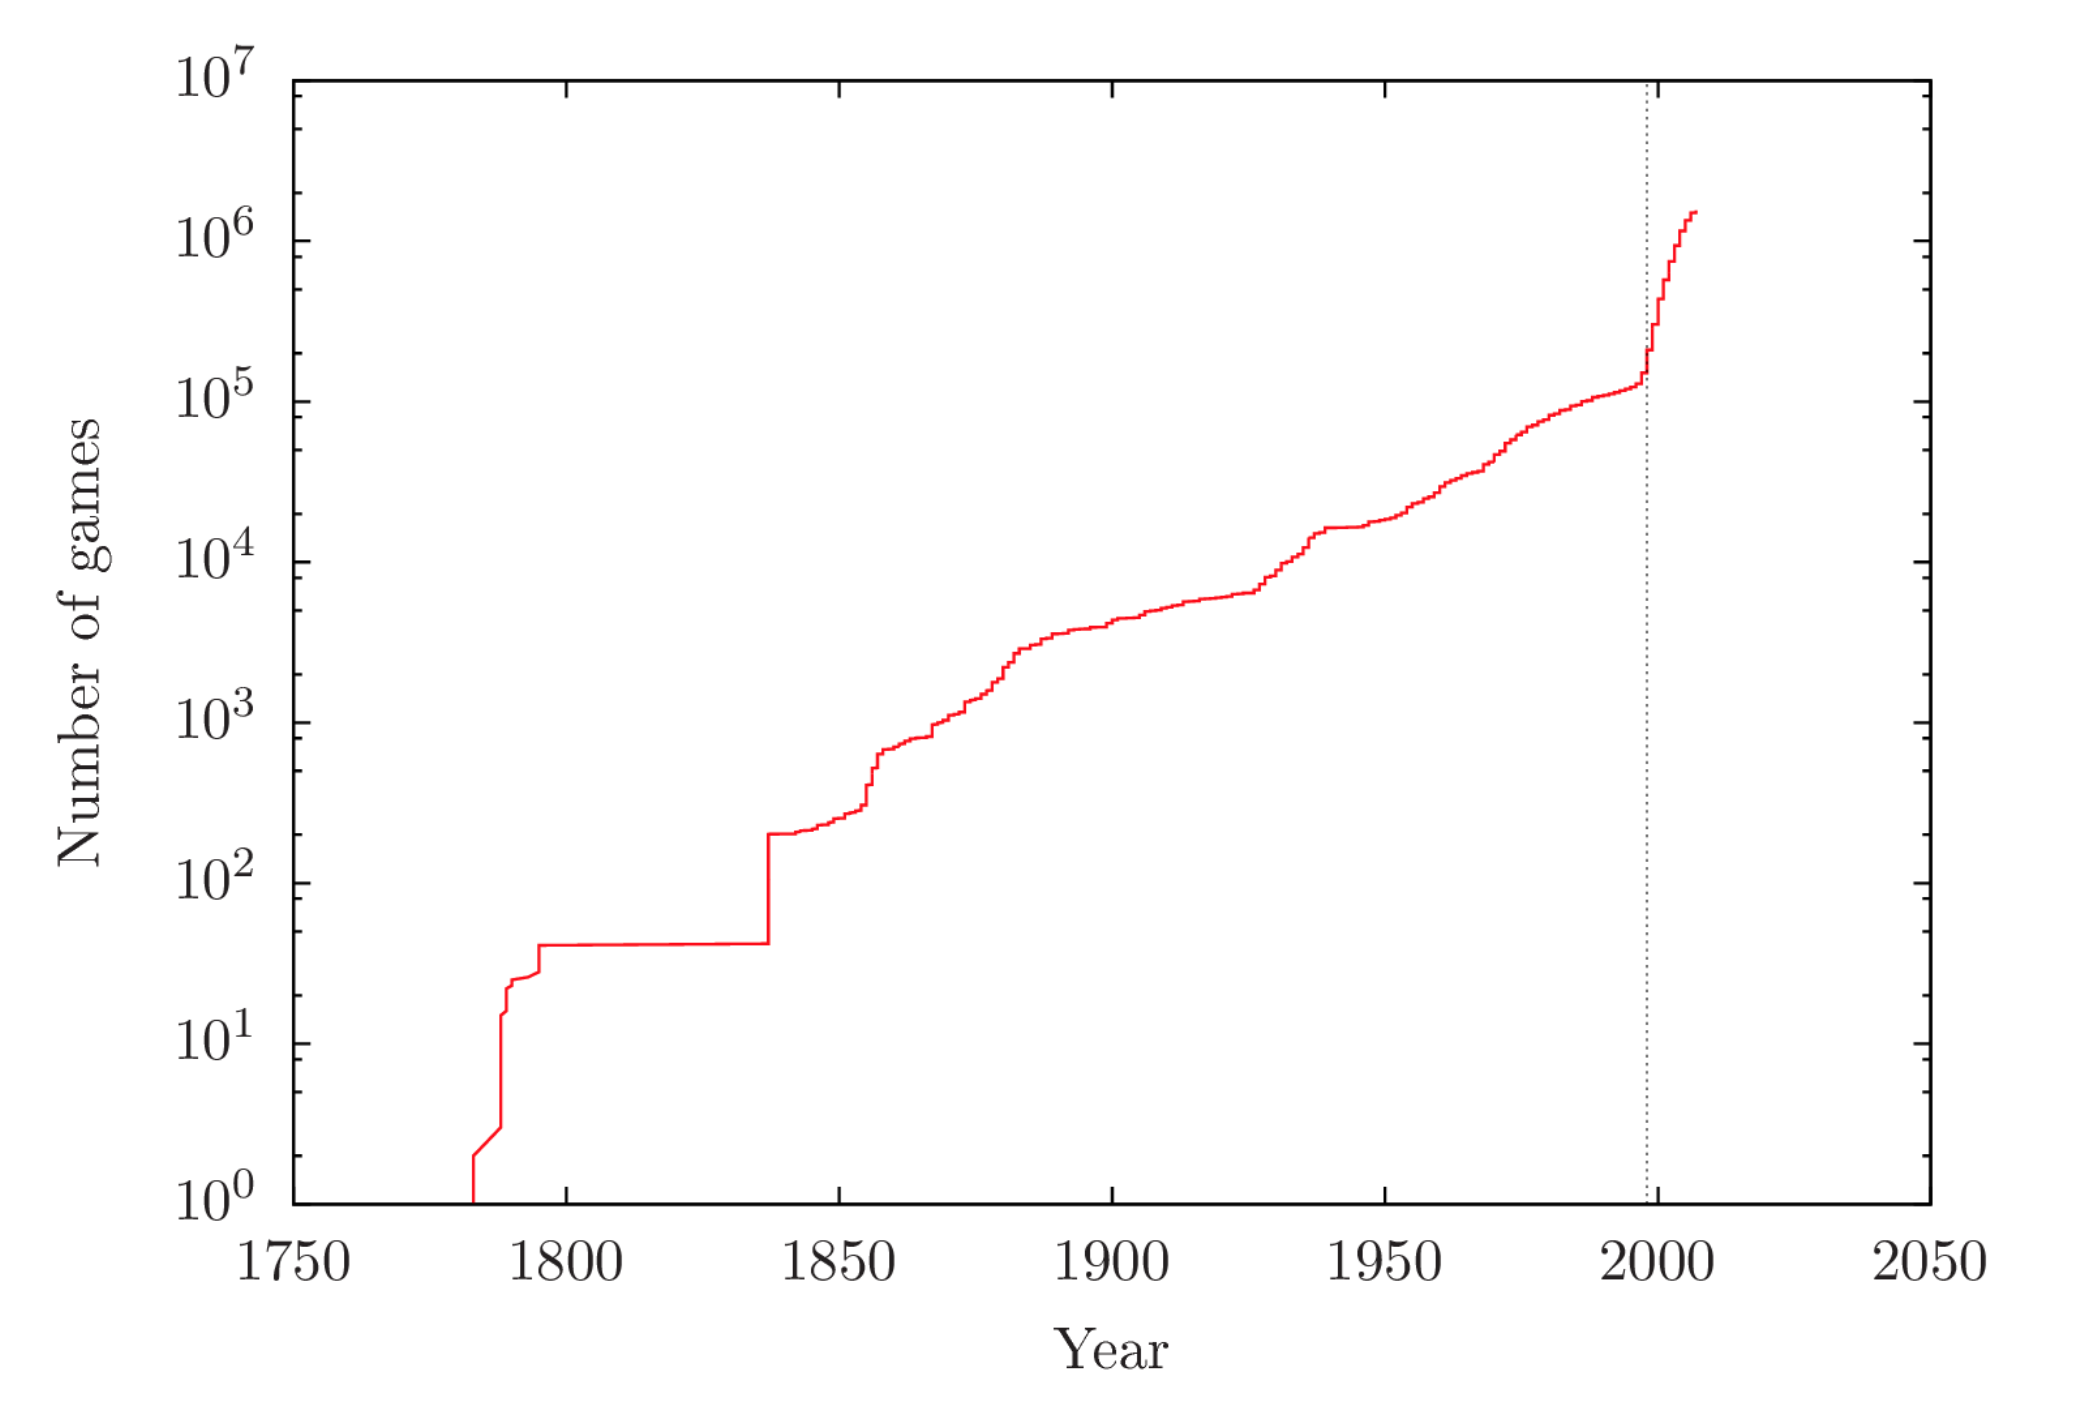

In [ ]:
!pip3 install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 4.4MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=54e8283a889f1474a4a9a9cd14313b29b8867145788bee28c87980256fb14b56
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
# API token --> kaggle.json
os.environ['KAGGLE_USERNAME'] = "tanushgoel" 
os.environ['KAGGLE_KEY'] = "5cba2fce73a8fa4c7e860688cd3da250" 

In [ ]:
# https://www.kaggle.com/milesh1/35-million-chess-games
!kaggle datasets download -d milesh1/35-million-chess-games

100% 1.52G/1.52G [00:19<00:00, 107MB/s] 
100% 1.52G/1.52G [00:19<00:00, 83.3MB/s]


In [ ]:
!unzip -q -o 35-million-chess-games.zip

In [ ]:
chess_games = open("all_with_filtered_anotations/all_with_filtered_anotations_since1998.txt", "r").read().splitlines()[5:]
chess_games[:10]

['1 2000.03.14 1-0 2851 None 67 date_false result_false welo_false belo_true edate_true setup_false fen_false result2_false oyrange_false blen_false ### W1.d4 B1.d5 W2.c4 B2.e6 W3.Nc3 B3.Nf6 W4.cxd5 B4.exd5 W5.Bg5 B5.Be7 W6.e3 B6.Ne4 W7.Bxe7 B7.Nxc3 W8.Bxd8 B8.Nxd1 W9.Bxc7 B9.Nxb2 W10.Rb1 B10.Nc4 W11.Bxc4 B11.dxc4 W12.Ne2 B12.O-O W13.Nc3 B13.b6 W14.d5 B14.Na6 W15.Bd6 B15.Rd8 W16.Ba3 B16.Bb7 W17.e4 B17.f6 W18.Ke2 B18.Nc7 W19.Rhd1 B19.Ba6 W20.Ke3 B20.Kf7 W21.g4 B21.g5 W22.h4 B22.h6 W23.Rh1 B23.Re8 W24.f3 B24.Bb7 W25.hxg5 B25.fxg5 W26.d6 B26.Nd5+ W27.Nxd5 B27.Bxd5 W28.Rxh6 B28.c3 W29.d7 B29.Re6 W30.Rh7+ B30.Kg8 W31.Rbh1 B31.Bc6 W32.Rh8+ B32.Kf7 W33.Rxa8 B33.Bxd7 W34.Rh7+ ',
 '2 2000.03.14 1-0 2851 None 53 date_false result_false welo_false belo_true edate_true setup_false fen_false result2_false oyrange_false blen_false ### W1.e4 B1.d5 W2.exd5 B2.Qxd5 W3.Nc3 B3.Qa5 W4.d4 B4.Nf6 W5.Nf3 B5.c6 W6.Ne5 B6.Bf5 W7.g4 B7.Be4 W8.f3 B8.Bd5 W9.a3 B9.Nbd7 W10.Be3 B10.Nxe5 W11.dxe5 B11.Nxg4 W12.Bd4 B1

In [ ]:
import re

chess_exp = []
winnaz = []
for game in chess_games:
    try:
        chess_exp.append(game.split("W1.")[1])
        wld = chess_games[0].split()[2]
        if wld == "1-0":
            winnaz.append(True)
        elif wld == "0-1":
            winnaz.append(False)
        else:
            winnaz.append(np.random.choice([True, False]))
    except:
        pass

del chess_games
chess_exp[:10]

['d4 B1.d5 W2.c4 B2.e6 W3.Nc3 B3.Nf6 W4.cxd5 B4.exd5 W5.Bg5 B5.Be7 W6.e3 B6.Ne4 W7.Bxe7 B7.Nxc3 W8.Bxd8 B8.Nxd1 W9.Bxc7 B9.Nxb2 W10.Rb1 B10.Nc4 W11.Bxc4 B11.dxc4 W12.Ne2 B12.O-O W13.Nc3 B13.b6 W14.d5 B14.Na6 W15.Bd6 B15.Rd8 W16.Ba3 B16.Bb7 W17.e4 B17.f6 W18.Ke2 B18.Nc7 W19.Rhd1 B19.Ba6 W20.Ke3 B20.Kf7 W21.g4 B21.g5 W22.h4 B22.h6 W23.Rh1 B23.Re8 W24.f3 B24.Bb7 W25.hxg5 B25.fxg5 W26.d6 B26.Nd5+ W27.Nxd5 B27.Bxd5 W28.Rxh6 B28.c3 W29.d7 B29.Re6 W30.Rh7+ B30.Kg8 W31.Rbh1 B31.Bc6 W32.Rh8+ B32.Kf7 W33.Rxa8 B33.Bxd7 W34.Rh7+ ',
 'e4 B1.d5 W2.exd5 B2.Qxd5 W3.Nc3 B3.Qa5 W4.d4 B4.Nf6 W5.Nf3 B5.c6 W6.Ne5 B6.Bf5 W7.g4 B7.Be4 W8.f3 B8.Bd5 W9.a3 B9.Nbd7 W10.Be3 B10.Nxe5 W11.dxe5 B11.Nxg4 W12.Bd4 B12.e6 W13.b4 B13.Qd8 W14.Nxd5 B14.Qxd5 W15.c4 B15.Ne3 W16.cxd5 B16.Nxd1 W17.dxc6 B17.bxc6 W18.Rxd1 B18.Be7 W19.Ba6 B19.O-O W20.Ke2 B20.Rab8 W21.Rc1 B21.Rfd8 W22.Rhd1 B22.c5 W23.Bxc5 B23.Rxd1 W24.Rxd1 B24.Bxc5 W25.bxc5 B25.g6 W26.c6 B26.Rb2+ W27.Rd2 ',
 'e4 B1.e5 W2.Nf3 B2.Nc6 W3.Bc4 B3.Bc5 W4.c3 B4.Nf6 W5.d3

In [ ]:
len(chess_exp)

3523236

In [ ]:
# centuries of games

loss = np.inf
losses = []
t_updates = 0
l_updates = 0
delta_lt = 0
delta_buffer = 0
delta_buffer_thresh = batch_size//8
for episode, game in enumerate(chess_exp, 1):

    board.reset()
    state = board_to_array(board)

    episode_states_black, episode_actions_black, episode_rewards_black, episode_next_states_black, episode_dones_black = [], [], [], [], []
    episode_states_white, episode_actions_white, episode_rewards_white, episode_next_states_white, episode_dones_white = [], [], [], [], []

    done = False
    total_moves = 0

    try:

        moves = re.split('\s|[.]', game)[::2]

        for move in moves:

            white_turn = board.turn

            action = str(board.parse_san(move))

            total_moves += 1
            reward = 0

            if board.is_capture(chess.Move.from_uci(action)):
                pos = square_to_position[action[2:4]]
                piece = str(board.piece_at(pos))
                reward += piece_to_val[piece]
                if white_turn:
                    episode_rewards_black[-1] -= piece_to_val[piece]
                else:
                    episode_rewards_white[-1] -= piece_to_val[piece]

            if len(action) > 4: # promotion
                reward += piece_to_val[action[-1]]
                if white_turn:
                    episode_rewards_black[-1] -= piece_to_val[action[-1]]
                else:
                    episode_rewards_white[-1] -= piece_to_val[action[-1]]

            board.push(chess.Move.from_uci(action))
            if episode % 250 == 0:
                display(board)

            if board.is_checkmate():
                print("CHECKMATE!")
                reward += 100
                done = True
                if white_turn:
                    episode_rewards_black[-1] -= 100
                    episode_dones_black[-1] = True
                else:
                    episode_rewards_white[-1] -= 100
                    episode_dones_white[-1] = True

            if board.is_stalemate() or board.is_seventyfive_moves() or board.is_insufficient_material():
                reward -= 25
                done = True
                if white_turn:
                    episode_rewards_black[-1] -= 25
                    episode_dones_black[-1] = True
                else:
                    episode_rewards_white[-1] -= 25
                    episode_dones_white[-1] = True

            if board.is_check():
                reward += 0.1
                if white_turn:
                    episode_rewards_black[-1] -= 0.1
                else:
                    episode_rewards_white[-1] -= 0.1

            if white_turn:

                episode_states_white.append(state)
                episode_actions_white.append(action)
                episode_rewards_white.append(reward)
                episode_dones_white.append(done)

                state = board_to_array(board)

                if len(episode_states_black) > len(episode_next_states_black):
                    episode_next_states_black.append(state)

                if done:
                    episode_next_states_white.append(state) 

            else:

                episode_states_black.append(state)
                episode_actions_black.append(action)
                episode_rewards_black.append(reward) 
                episode_dones_black.append(done)

                state = board_to_array(board)

                episode_next_states_white.append(state)

                if done:
                    episode_next_states_black.append(state) 

            if len(buffer) >= batch_size and delta_buffer > delta_buffer_thresh:

                states, actions, rewards, next_states, dones = buffer.sample(batch_size)
                loss = train_step(states, actions, rewards, next_states, dones)
                losses.append(loss)

                if constant(losses):
                    hard_update_target_network() # soft_update_target_network()
                    t_updates += 1
                    delta_lt = 0
                else:
                    delta_lt += 1

                delta_buffer -= delta_buffer_thresh
                l_updates += 1

        buffer.dump(episode_states_white, episode_actions_white, episode_rewards_white, episode_next_states_white, episode_dones_white)
        buffer.dump(episode_states_black, episode_actions_black, episode_rewards_black, episode_next_states_black, episode_dones_black)
        delta_buffer += len(episode_dones_white) + len(episode_dones_black)
    
    except KeyboardInterrupt:
        break

    except:
        print("bad game")

    if episode % 10 == 0:
        print("episode:", str(episode), "num moves:", total_moves, "buffer:", len(buffer), "loss:", float(loss), "target_updates:", t_updates, "local_updates:", l_updates, "delta_lt:", delta_lt)
    
    if (episode+1) % 250 == 0:
        clear_output()

In [ ]:
# centuries of games with engine completetion

loss = np.inf
losses = []
t_updates = 0
l_updates = 0
delta_lt = 0
delta_buffer = 0
delta_buffer_thresh = batch_size//8
for episode, game in enumerate(zip(chess_exp, winnaz), 1):

    board.reset()
    state = board_to_array(board)

    episode_states_black, episode_actions_black, episode_rewards_black, episode_next_states_black, episode_dones_black = [], [], [], [], []
    episode_states_white, episode_actions_white, episode_rewards_white, episode_next_states_white, episode_dones_white = [], [], [], [], []

    done = False
    total_moves = 0

    try:

        moves = re.split('\s|[.]', game[0])[::2]
        winner = game[1]

        for move in moves:

            white_turn = board.turn

            action = str(board.parse_san(move))

            total_moves += 1
            reward = 0

            if board.is_capture(chess.Move.from_uci(action)):
                pos = square_to_position[action[2:4]]
                piece = str(board.piece_at(pos))
                reward += piece_to_val[piece]
                if white_turn:
                    episode_rewards_black[-1] -= piece_to_val[piece]
                else:
                    episode_rewards_white[-1] -= piece_to_val[piece]

            if len(action) > 4: # promotion
                reward += piece_to_val[action[-1]]
                if white_turn:
                    episode_rewards_black[-1] -= piece_to_val[action[-1]]
                else:
                    episode_rewards_white[-1] -= piece_to_val[action[-1]]

            board.push(chess.Move.from_uci(action))
            if episode % 250 == 0:
                display(board)

            if board.is_checkmate():
                reward += 100
                done = True
                if white_turn:
                    episode_rewards_black[-1] -= 100
                    episode_dones_black[-1] = True
                else:
                    episode_rewards_white[-1] -= 100
                    episode_dones_white[-1] = True

            if board.is_stalemate() or board.is_seventyfive_moves() or board.is_insufficient_material():
                reward -= 25
                done = True
                if white_turn:
                    episode_rewards_black[-1] -= 25
                    episode_dones_black[-1] = True
                else:
                    episode_rewards_white[-1] -= 25
                    episode_dones_white[-1] = True

            if board.is_check():
                reward += 0.1
                if white_turn:
                    episode_rewards_black[-1] -= 0.1
                else:
                    episode_rewards_white[-1] -= 0.1

            if white_turn:

                episode_states_white.append(state)
                episode_actions_white.append(action)
                episode_rewards_white.append(reward)
                episode_dones_white.append(done)

                state = board_to_array(board)

                if len(episode_states_black) > len(episode_next_states_black):
                    episode_next_states_black.append(state)

                if done:
                    episode_next_states_white.append(state) 

            else:

                episode_states_black.append(state)
                episode_actions_black.append(action)
                episode_rewards_black.append(reward) 
                episode_dones_black.append(done)

                state = board_to_array(board)

                episode_next_states_white.append(state)

                if done:
                    episode_next_states_black.append(state) 

            if len(buffer) >= batch_size and delta_buffer > delta_buffer_thresh:

                states, actions, rewards, next_states, dones = buffer.sample(batch_size)
                loss = train_step(states, actions, rewards, next_states, dones)
                losses.append(loss)

                if constant(losses):
                    hard_update_target_network() # soft_update_target_network()
                    t_updates += 1
                    delta_lt = 0
                else:
                    delta_lt += 1

                delta_buffer -= delta_buffer_thresh
                l_updates += 1

        while not done:

            white_turn = board.turn

            if white_turn:
                if winner:
                    action = select_stockfish_action_op(board, total_moves) # select_komodo_action_op(board, total_moves)
                else:
                    action = str(np.random.choice(list(board.legal_moves))) # select_stockfish_action(board, total_moves) # select_komodo_action(board, total_moves) 
            else:
                if not winner:
                    action = select_stockfish_action_op(board, total_moves) # select_komodo_action_op(board, total_moves)
                else:
                    action = str(np.random.choice(list(board.legal_moves))) # select_stockfish_action(board, total_moves) # select_komodo_action(board, total_moves)

            total_moves += 1
            reward = 0

            if board.is_capture(chess.Move.from_uci(action)):
                pos = square_to_position[action[2:4]]
                piece = str(board.piece_at(pos))
                reward += piece_to_val[piece]
                if white_turn:
                    episode_rewards_black[-1] -= piece_to_val[piece]
                else:
                    episode_rewards_white[-1] -= piece_to_val[piece]

            if len(action) > 4: # promotion
                reward += piece_to_val[action[-1]]
                if white_turn:
                    episode_rewards_black[-1] -= piece_to_val[action[-1]]
                else:
                    episode_rewards_white[-1] -= piece_to_val[action[-1]]

            board.push(chess.Move.from_uci(action))
            if episode % 250 == 0:
                display(board)

            if board.is_checkmate():
                reward += 100
                done = True
                if white_turn:
                    episode_rewards_black[-1] -= 100
                    episode_dones_black[-1] = True
                else:
                    episode_rewards_white[-1] -= 100
                    episode_dones_white[-1] = True

            if board.is_stalemate() or board.is_seventyfive_moves() or board.is_insufficient_material():
                reward -= 25
                done = True
                if white_turn:
                    episode_rewards_black[-1] -= 25
                    episode_dones_black[-1] = True
                else:
                    episode_rewards_white[-1] -= 25
                    episode_dones_white[-1] = True

            if board.is_check():
                reward += 0.1
                if white_turn:
                    episode_rewards_black[-1] -= 0.1
                else:
                    episode_rewards_white[-1] -= 0.1

            if white_turn:

                episode_states_white.append(state)
                episode_actions_white.append(action)
                episode_rewards_white.append(reward)
                episode_dones_white.append(done)

                state = board_to_array(board)

                if len(episode_states_black) > len(episode_next_states_black):
                    episode_next_states_black.append(state)

                if done:
                    episode_next_states_white.append(state) 

            else:

                episode_states_black.append(state)
                episode_actions_black.append(action)
                episode_rewards_black.append(reward) 
                episode_dones_black.append(done)

                state = board_to_array(board)

                episode_next_states_white.append(state)

                if done:
                    episode_next_states_black.append(state) 

            if len(buffer) >= batch_size and delta_buffer > delta_buffer_thresh:

                states, actions, rewards, next_states, dones = buffer.sample(batch_size)
                loss = train_step(states, actions, rewards, next_states, dones)
                losses.append(loss)

                if constant(losses):
                    hard_update_target_network() # soft_update_target_network() 
                    t_updates += 1
                    delta_lt = 0
                else:
                    delta_lt += 1

                delta_buffer -= delta_buffer_thresh
                l_updates += 1

        buffer.dump(episode_states_white, episode_actions_white, episode_rewards_white, episode_next_states_white, episode_dones_white)
        buffer.dump(episode_states_black, episode_actions_black, episode_rewards_black, episode_next_states_black, episode_dones_black)
        delta_buffer += len(episode_dones_white) + len(episode_dones_black)
    
    except KeyboardInterrupt:
        break

    except:
        print("bad game")

    if episode % 10 == 0:
        print("episode:", str(episode), "num moves:", total_moves, "buffer:", len(buffer), "loss:", float(loss), "target_updates:", t_updates, "local_updates:", l_updates, "delta_lt:", delta_lt)
    
    if (episode+1) % 250 == 0:
        clear_output()

## Self-Play

In [ ]:
# self-play without opening book

num_episodes = 100000

epsilon = 0.999
eps_decay = 1.00005

loss = np.inf
losses = []
t_updates = 0
l_updates = 0
delta_lt = 0
delta_buffer = 0
delta_buffer_thresh = batch_size//8
for episode in range(1, num_episodes+1):

    board.reset()
    state = board_to_array(board)

    episode_states_black, episode_actions_black, episode_rewards_black, episode_next_states_black, episode_dones_black = [], [], [], [], []
    episode_states_white, episode_actions_white, episode_rewards_white, episode_next_states_white, episode_dones_white = [], [], [], [], []

    done = False
    total_moves = 0
    invalid_move = False

    while not done:

        white_turn = board.turn

        action = select_epsilon_greedy_action(board, epsilon)

        total_moves += 1
        reward = 0

        if board.is_capture(chess.Move.from_uci(action)):
            pos = square_to_position[action[2:4]]
            piece = str(board.piece_at(pos))
            reward += piece_to_val[piece]
            if white_turn:
                episode_rewards_black[-1] -= piece_to_val[piece]
            else:
                episode_rewards_white[-1] -= piece_to_val[piece]

        if len(action) > 4: # promotion
            reward += piece_to_val[action[-1]]
            if white_turn:
                episode_rewards_black[-1] -= piece_to_val[action[-1]]
            else:
                episode_rewards_white[-1] -= piece_to_val[action[-1]]

        board.push(chess.Move.from_uci(action))
        if episode % 500 == 0:
            display(board)

        if board.is_checkmate():
            print("CHECKMATE!")
            reward += 100
            done = True
            if white_turn:
                episode_rewards_black[-1] -= 100
                episode_dones_black[-1] = True
            else:
                episode_rewards_white[-1] -= 100
                episode_dones_white[-1] = True

        if board.is_stalemate() or board.is_seventyfive_moves() or board.is_insufficient_material():
            reward -= 25
            done = True
            if white_turn:
                episode_rewards_black[-1] -= 25
                episode_dones_black[-1] = True
            else:
                episode_rewards_white[-1] -= 25
                episode_dones_white[-1] = True

        if board.is_check():
            reward += 0.1
            if white_turn:
                episode_rewards_black[-1] -= 0.1
            else:
                episode_rewards_white[-1] -= 0.1

        if white_turn:

            episode_states_white.append(state)
            episode_actions_white.append(action)
            episode_rewards_white.append(reward)
            episode_dones_white.append(done)

            state = board_to_array(board)

            if len(episode_states_black) > len(episode_next_states_black):
                episode_next_states_black.append(state)

            if done:
                episode_next_states_white.append(state) 

        else:

            episode_states_black.append(state)
            episode_actions_black.append(action)
            episode_rewards_black.append(reward) 
            episode_dones_black.append(done)

            state = board_to_array(board)

            episode_next_states_white.append(state)

            if done:
                episode_next_states_black.append(state) 

        if len(buffer) >= batch_size and delta_buffer > delta_buffer_thresh:

            states, actions, rewards, next_states, dones = buffer.sample(batch_size)
            loss = train_step(states, actions, rewards, next_states, dones)
            losses.append(loss)

            if constant(losses):
                hard_update_target_network() # soft_update_target_network() 
                t_updates += 1
                delta_lt = 0
            else:
                delta_lt += 1

            delta_buffer -= delta_buffer_thresh
            l_updates += 1

    buffer.dump(episode_states_white, episode_actions_white, episode_rewards_white, episode_next_states_white, episode_dones_white)
    buffer.dump(episode_states_black, episode_actions_black, episode_rewards_black, episode_next_states_black, episode_dones_black)
    delta_buffer += len(episode_dones_white) + len(episode_dones_black)

    if epsilon > 0.025:
        epsilon /= eps_decay

    if episode % 10 == 0:
        print("episode:", str(episode)+"/"+str(num_episodes), "num moves:", total_moves, "buffer:", len(buffer), "loss:", float(loss), "target_updates:", t_updates, "local_updates:", l_updates, "epsilon:", epsilon, "delta_lt:", delta_lt)
    
    if (episode+1) % 500 == 0:
        clear_output()

In [ ]:
# get opening book
!wget https://github.com/niklasf/python-chess/raw/master/data/polyglot/performance.bin

--2021-05-02 21:46:58--  https://github.com/niklasf/python-chess/raw/master/data/polyglot/performance.bin
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/niklasf/python-chess/master/data/polyglot/performance.bin [following]
--2021-05-02 21:46:58--  https://raw.githubusercontent.com/niklasf/python-chess/master/data/polyglot/performance.bin
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1487264 (1.4M) [application/octet-stream]
Saving to: ‘performance.bin.1’

performance.bin.1   100%[===================>]   1.42M  --.-KB/s    in 0.06s   

2021-05-02 21:46:59 (24.1 MB/s) - ‘performance.bin.1’ save

In [ ]:
import chess.polyglot

reader = chess.polyglot.open_reader("performance.bin")

board.reset()
for entry in reader.find_all(board):
    print(entry.move, entry.weight, entry.learn)

e2e4 1 486544384
d2d4 1 5120
c2c4 1 3825144832


In [ ]:
# self-play with opening book

num_episodes = 100000

epsilon = 0.999
eps_decay = 1.00005

loss = np.inf
losses = []
t_updates = 0
l_updates = 0
delta_lt = 0
delta_buffer = 0
delta_buffer_thresh = batch_size//8
for episode in range(1, num_episodes+1):

    board.reset()
    state = board_to_array(board)

    episode_states_black, episode_actions_black, episode_rewards_black, episode_next_states_black, episode_dones_black = [], [], [], [], []
    episode_states_white, episode_actions_white, episode_rewards_white, episode_next_states_white, episode_dones_white = [], [], [], [], []

    done = False
    total_moves = 0
    invalid_move = False

    for i in range(np.random.randint(22)):
        entries = list(reader.find_all(board))
        if len(entries) == 0:
            break
        action = str(entries[np.random.randint(len(entries))].move)

        total_moves += 1
        reward = 0

        if board.is_capture(chess.Move.from_uci(action)):
            pos = square_to_position[action[2:4]]
            piece = str(board.piece_at(pos))
            reward += piece_to_val[piece]
            if white_turn:
                episode_rewards_black[-1] -= piece_to_val[piece]
            else:
                episode_rewards_white[-1] -= piece_to_val[piece]

        if len(action) > 4: # promotion
            reward += piece_to_val[action[-1]]
            if white_turn:
                episode_rewards_black[-1] -= piece_to_val[action[-1]]
            else:
                episode_rewards_white[-1] -= piece_to_val[action[-1]]

        board.push(chess.Move.from_uci(action))
        if episode % 500 == 0:
            display(board)

        if board.is_checkmate():
            print("CHECKMATE!")
            reward += 100
            done = True
            if white_turn:
                episode_rewards_black[-1] -= 100
                episode_dones_black[-1] = True
            else:
                episode_rewards_white[-1] -= 100
                episode_dones_white[-1] = True

        if board.is_stalemate() or board.is_seventyfive_moves() or board.is_insufficient_material():
            reward -= 25
            done = True
            if white_turn:
                episode_rewards_black[-1] -= 25
                episode_dones_black[-1] = True
            else:
                episode_rewards_white[-1] -= 25
                episode_dones_white[-1] = True

        if board.is_check():
            reward += 0.1
            if white_turn:
                episode_rewards_black[-1] -= 0.1
            else:
                episode_rewards_white[-1] -= 0.1

        if white_turn:

            episode_states_white.append(state)
            episode_actions_white.append(action)
            episode_rewards_white.append(reward)
            episode_dones_white.append(done)

            state = board_to_array(board)

            if len(episode_states_black) > len(episode_next_states_black):
                episode_next_states_black.append(state)

            if done:
                episode_next_states_white.append(state) 

        else:

            episode_states_black.append(state)
            episode_actions_black.append(action)
            episode_rewards_black.append(reward) 
            episode_dones_black.append(done)

            state = board_to_array(board)

            episode_next_states_white.append(state)

            if done:
                episode_next_states_black.append(state) 

        if len(buffer) >= batch_size and delta_buffer > delta_buffer_thresh:

            states, actions, rewards, next_states, dones = buffer.sample(batch_size)
            loss = train_step(states, actions, rewards, next_states, dones)
            losses.append(loss)

            if constant(losses):
                hard_update_target_network() # soft_update_target_network() 
                t_updates += 1
                delta_lt = 0
            else:
                delta_lt += 1

            delta_buffer -= delta_buffer_thresh
            l_updates += 1

    while not done:

        white_turn = board.turn

        action = select_epsilon_greedy_action(board, epsilon)

        total_moves += 1
        reward = 0

        if board.is_capture(chess.Move.from_uci(action)):
            pos = square_to_position[action[2:4]]
            piece = str(board.piece_at(pos))
            reward += piece_to_val[piece]
            if white_turn:
                episode_rewards_black[-1] -= piece_to_val[piece]
            else:
                episode_rewards_white[-1] -= piece_to_val[piece]

        if len(action) > 4: # promotion
            reward += piece_to_val[action[-1]]
            if white_turn:
                episode_rewards_black[-1] -= piece_to_val[action[-1]]
            else:
                episode_rewards_white[-1] -= piece_to_val[action[-1]]

        board.push(chess.Move.from_uci(action))
        if episode % 500 == 0:
            display(board)

        if board.is_checkmate():
            print("CHECKMATE!")
            reward += 100
            done = True
            if white_turn:
                episode_rewards_black[-1] -= 100
                episode_dones_black[-1] = True
            else:
                episode_rewards_white[-1] -= 100
                episode_dones_white[-1] = True

        if board.is_stalemate() or board.is_seventyfive_moves() or board.is_insufficient_material():
            reward -= 25
            done = True
            if white_turn:
                episode_rewards_black[-1] -= 25
                episode_dones_black[-1] = True
            else:
                episode_rewards_white[-1] -= 25
                episode_dones_white[-1] = True

        if board.is_check():
            reward += 0.1
            if white_turn:
                episode_rewards_black[-1] -= 0.1
            else:
                episode_rewards_white[-1] -= 0.1

        if white_turn:

            episode_states_white.append(state)
            episode_actions_white.append(action)
            episode_rewards_white.append(reward)
            episode_dones_white.append(done)

            state = board_to_array(board)

            if len(episode_states_black) > len(episode_next_states_black):
                episode_next_states_black.append(state)

            if done:
                episode_next_states_white.append(state) 

        else:

            episode_states_black.append(state)
            episode_actions_black.append(action)
            episode_rewards_black.append(reward) 
            episode_dones_black.append(done)

            state = board_to_array(board)

            episode_next_states_white.append(state)

            if done:
                episode_next_states_black.append(state) 

        if len(buffer) >= batch_size and delta_buffer > delta_buffer_thresh:

            states, actions, rewards, next_states, dones = buffer.sample(batch_size)
            loss = train_step(states, actions, rewards, next_states, dones)
            losses.append(loss)

            if constant(losses):
                hard_update_target_network() # soft_update_target_network() 
                t_updates += 1
                delta_lt = 0
            else:
                delta_lt += 1

            delta_buffer -= delta_buffer_thresh
            l_updates += 1

    buffer.dump(episode_states_white, episode_actions_white, episode_rewards_white, episode_next_states_white, episode_dones_white)
    buffer.dump(episode_states_black, episode_actions_black, episode_rewards_black, episode_next_states_black, episode_dones_black)
    delta_buffer += len(episode_dones_white) + len(episode_dones_black)

    if epsilon > 0.025:
        epsilon /= eps_decay

    if episode % 10 == 0:
        print("episode:", str(episode)+"/"+str(num_episodes), "num moves:", total_moves, "buffer:", len(buffer), "loss:", float(loss), "target_updates:", t_updates, "local_updates:", l_updates, "epsilon:", epsilon, "delta_lt:", delta_lt)
    
    if (episode+1) % 500 == 0:
        clear_output()

## Losses

In [ ]:
l_updates

32310

In [ ]:
t_updates

3

In [ ]:
len(losses)

32310

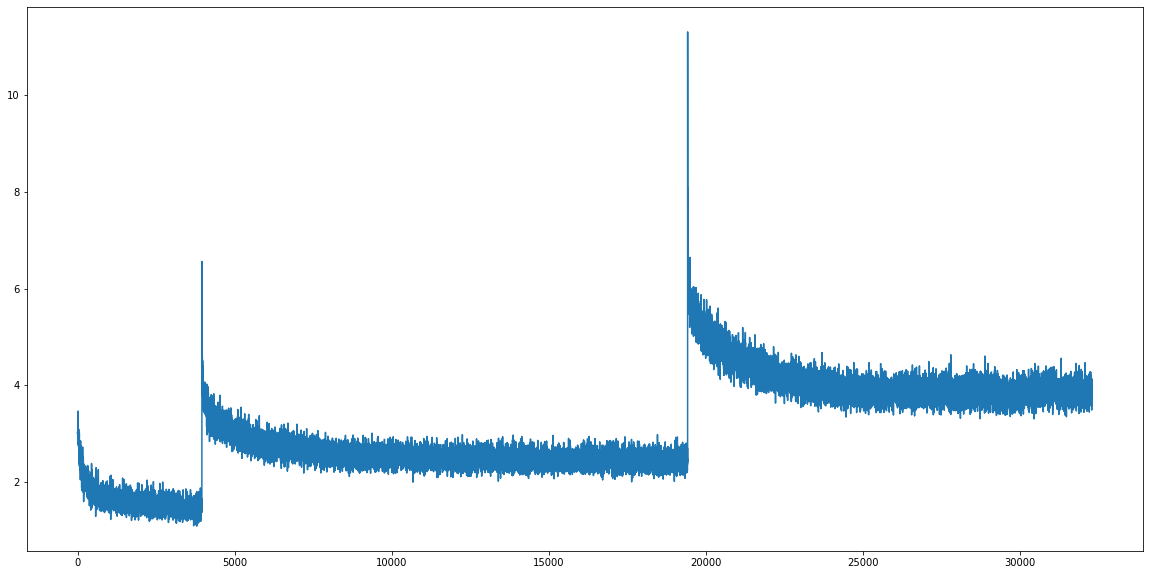

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.plot(losses)

## Save All

In [ ]:
# close engines to free space
stockfish.close()
komodo.close()

In [ ]:
local_nn.save_weights("chessAI_local.hdf5")
target_nn.save_weights("chessAI_target.hdf5")
buffer.save()

In [ ]:
from zipfile import ZipFile

zippydippy = ZipFile('chessAI.zip', 'w')
zippydippy.write('chessAI_local.hdf5')
zippydippy.write('chessAI_target.hdf5')
zippydippy.write('experience.npy')
zippydippy.close()

In [ ]:
!ls -sh chessAI.zip

In [ ]:
from google.colab import drive

drive.mount('/drive')

In [ ]:
!cp -u chessAI.zip /drive/MyDrive

## Visualize CNN (Trained) Filters

In [ ]:
filters = local_nn.get_filters(1)

fig = plt.figure(figsize=(32,4))
for img in range(32):
    ax = fig.add_subplot(2, 16, img+1)
    ax = plt.imshow(filters[0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

In [ ]:
filters = local_nn.get_filters(2)

fig = plt.figure(figsize=(32,8))
for img in range(64):
    ax = fig.add_subplot(4, 16, img+1)
    ax = plt.imshow(filters[0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

In [ ]:
filters = local_nn.get_filters(3)

fig = plt.figure(figsize=(32,16))
for img in range(128):
    ax = fig.add_subplot(8, 16, img+1)
    ax = plt.imshow(filters[0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

In [ ]:
filters = local_nn.get_filters(4)

fig = plt.figure(figsize=(32,32))
for img in range(256):
    ax = fig.add_subplot(16, 16, img+1)
    ax = plt.imshow(filters[0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

## Visualize CNN (Trained) Activations On Starting Position

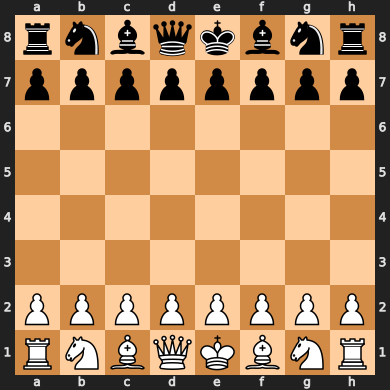

In [ ]:
board.reset()
display(board)
activations = local_nn.board_activations(board)

In [ ]:
select_epsilon_greedy_action(board, 0)

'e2e4'

In [ ]:
action_qz(board)

{'a2a3': 1.9235818,
 'a2a4': 1.003511,
 'b1a3': 1.5943992,
 'b1c3': 1.7954354,
 'b2b3': 1.2898715,
 'b2b4': 1.5678282,
 'c2c3': 0.97209525,
 'c2c4': 1.483777,
 'd2d3': 1.2639303,
 'd2d4': 2.1026912,
 'e2e3': 1.138889,
 'e2e4': 3.07514,
 'f2f3': 1.9258577,
 'f2f4': 1.3772329,
 'g1f3': 2.1039667,
 'g1h3': 3.0386763,
 'g2g3': 1.2640771,
 'g2g4': 1.7157378,
 'h2h3': 1.0757953,
 'h2h4': 1.5488503}

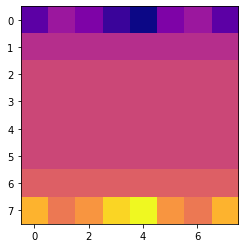

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[0].astype("int16"), cmap='plasma')

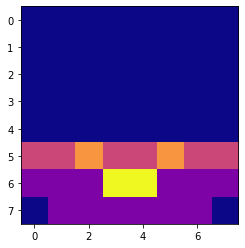

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[1].astype("int16"), cmap='plasma')

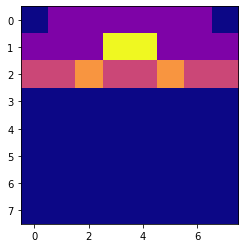

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[2].astype("int16"), cmap='plasma')

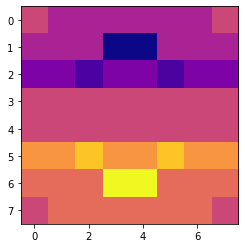

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[3].astype("int16"), cmap='plasma')

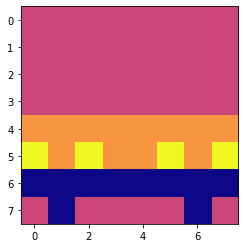

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[4].astype("int16"), cmap='plasma')

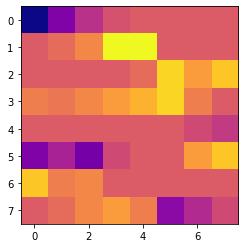

In [ ]:
plt.imshow(np.mean(board_to_array(board)[0].astype("int16"), axis=-1), cmap='plasma')

In [ ]:
fig = plt.figure(figsize=(32,4))
for img in range(32):
    ax = fig.add_subplot(2, 16, img+1)
    ax = plt.imshow(activations[0][0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

In [ ]:
fig = plt.figure(figsize=(32,8))
for img in range(64):
    ax = fig.add_subplot(4, 16, img+1)
    ax = plt.imshow(activations[1][0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

In [ ]:
fig = plt.figure(figsize=(32,16))
for img in range(128):
    ax = fig.add_subplot(8, 16, img+1)
    ax = plt.imshow(activations[2][0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

In [ ]:
fig = plt.figure(figsize=(32,32))
for img in range(256):
    ax = fig.add_subplot(16, 16, img+1)
    ax = plt.imshow(activations[3][0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

## Vizualize CNN (Trained) Activations On Random Position



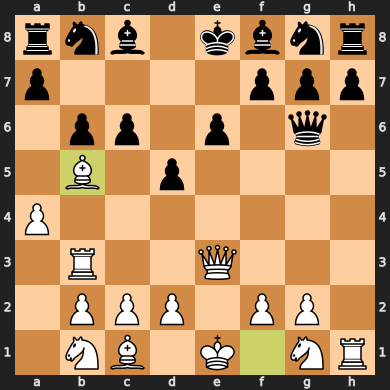

rnb1kbnr/p4ppp/1pp1p1q1/1B1p4/P7/1R2Q3/1PPP1PP1/1NB1K1NR b Kkq - 1 8


In [ ]:
board.reset()
for i in range(np.random.randint(25)):
    legal_moves = list(board.legal_moves)
    board.push(np.random.choice(legal_moves))
    if board.is_checkmate() or board.is_stalemate() or board.is_seventyfive_moves() or board.is_insufficient_material():
        board.reset()

display(board)
print(board.fen())
activations = local_nn.board_activations(board)

In [ ]:
select_epsilon_greedy_action(board, 0)

'g6g2'

In [ ]:
select_worst_action(board)

In [ ]:
action_qz(board)

{'a7a5': 1.7588488,
 'a7a6': 1.2778757,
 'b8a6': 1.2407645,
 'b8d7': 1.1207542,
 'c6b5': 1.9478803,
 'c8a6': 1.3526971,
 'c8b7': 1.5668287,
 'c8d7': 0.82281923,
 'd5d4': 1.1502495,
 'e6e5': 1.4276904,
 'e8d7': 1.1834801,
 'e8d8': 2.0701447,
 'e8e7': 1.3552223,
 'f7f5': 1.5824038,
 'f7f6': 1.807023,
 'f8a3': 0.6756873,
 'f8b4': 1.256881,
 'f8c5': 1.2072384,
 'f8d6': 1.5119549,
 'f8e7': 0.98659956,
 'g6c2': 1.9654863,
 'g6d3': 1.1746801,
 'g6e4': 1.6618218,
 'g6f5': 1.9534755,
 'g6f6': 1.3967075,
 'g6g2': 2.109078,
 'g6g3': 1.3641298,
 'g6g4': 1.6339644,
 'g6g5': 1.5682825,
 'g6h5': 1.8169211,
 'g6h6': 2.0037787,
 'g8e7': 1.0306748,
 'g8f6': 1.0935807,
 'g8h6': 1.6910152,
 'h7h5': 1.538971,
 'h7h6': 1.7348729}

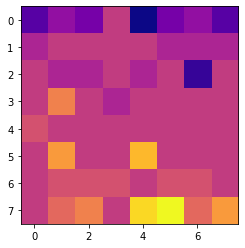

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[0].astype("int16"), cmap='plasma')

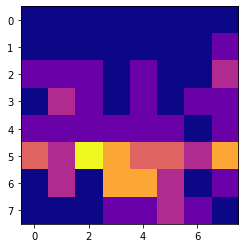

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[1].astype("int16"), cmap='plasma')

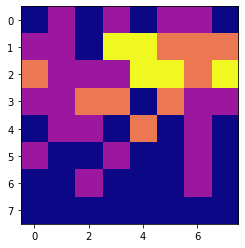

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[2].astype("int16"), cmap='plasma')

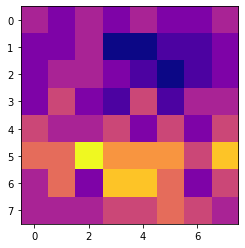

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[3].astype("int16"), cmap='plasma')

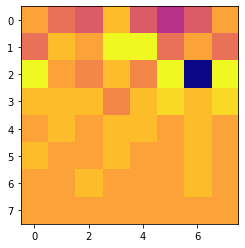

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[4].astype("int16"), cmap='plasma')

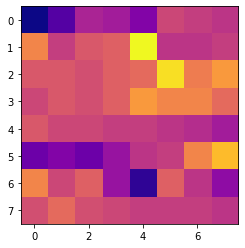

In [ ]:
plt.imshow(np.mean(board_to_array(board)[0].astype("int16"), axis=-1), cmap='plasma')

In [ ]:
fig = plt.figure(figsize=(32,4))
for img in range(32):
    ax = fig.add_subplot(2, 16, img+1)
    ax = plt.imshow(activations[0][0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

In [ ]:
fig = plt.figure(figsize=(32,8))
for img in range(64):
    ax = fig.add_subplot(4, 16, img+1)
    ax = plt.imshow(activations[1][0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

In [ ]:
fig = plt.figure(figsize=(32,16))
for img in range(128):
    ax = fig.add_subplot(8, 16, img+1)
    ax = plt.imshow(activations[2][0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

In [ ]:
fig = plt.figure(figsize=(32,32))
for img in range(256):
    ax = fig.add_subplot(16, 16, img+1)
    ax = plt.imshow(activations[3][0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

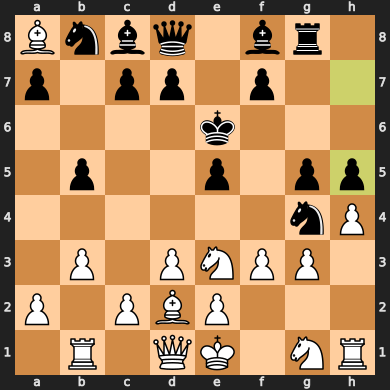

Bnbq1br1/p1pp1p2/4k3/1p2p1pp/6nP/1P1PNPP1/P1PBP3/1R1QK1NR w K - 0 14


In [ ]:
board.reset()
for i in range(np.random.randint(20,100)):
    legal_moves = list(board.legal_moves)
    board.push(np.random.choice(legal_moves))
    if board.is_checkmate() or board.is_stalemate() or board.is_seventyfive_moves() or board.is_insufficient_material():
        board.reset()

display(board) 
print(board.fen())
activations = local_nn.board_activations(board)

In [ ]:
select_epsilon_greedy_action(board, 0)

'f3g4'

In [ ]:
select_worst_action(board)

In [ ]:
action_qz(board)

{'a2a3': 1.5751308,
 'a2a4': 1.74409,
 'a8b7': 1.9918228,
 'a8c6': 2.1842449,
 'a8d5': 2.3315454,
 'a8e4': 2.2594516,
 'b1a1': 1.6921905,
 'b1b2': 1.5596782,
 'b1c1': 1.8142449,
 'b3b4': 1.9678069,
 'c2c3': 1.7306437,
 'c2c4': 1.6200773,
 'd1c1': 1.9392759,
 'd2a5': 1.9958953,
 'd2b4': 2.0738623,
 'd2c1': 1.4814787,
 'd2c3': 1.716033,
 'd3d4': 1.4451648,
 'e1f1': 1.731574,
 'e3c4': 1.9494758,
 'e3d5': 1.3586836,
 'e3f1': 1.4846421,
 'e3f5': 2.0276492,
 'e3g2': 1.6630558,
 'e3g4': 1.5873151,
 'f3f4': 1.674796,
 'f3g4': 2.3668027,
 'g1h3': 1.6494641,
 'h1h2': 1.7346381,
 'h1h3': 1.6776094,
 'h4g5': 2.3036327}

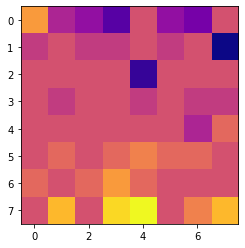

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[0].astype("int16"), cmap='plasma')

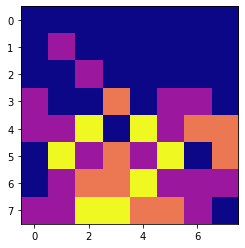

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[1].astype("int16"), cmap='plasma')

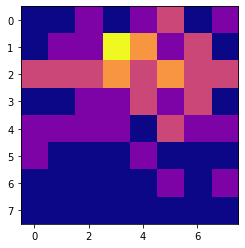

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[2].astype("int16"), cmap='plasma')

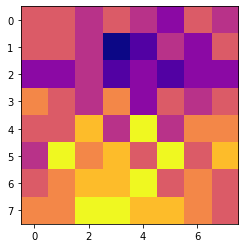

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[3].astype("int16"), cmap='plasma')

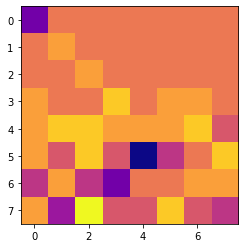

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[4].astype("int16"), cmap='plasma')

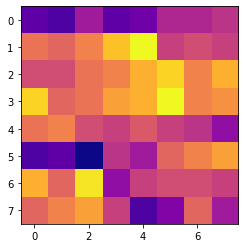

In [ ]:
plt.imshow(np.mean(board_to_array(board)[0].astype("int16"), axis=-1), cmap='plasma')

In [ ]:
fig = plt.figure(figsize=(32,4))
for img in range(32):
    ax = fig.add_subplot(2, 16, img+1)
    ax = plt.imshow(activations[0][0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

In [ ]:
fig = plt.figure(figsize=(32,8))
for img in range(64):
    ax = fig.add_subplot(4, 16, img+1)
    ax = plt.imshow(activations[1][0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

In [ ]:
fig = plt.figure(figsize=(32,16))
for img in range(128):
    ax = fig.add_subplot(8, 16, img+1)
    ax = plt.imshow(activations[2][0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

In [ ]:
fig = plt.figure(figsize=(32,32))
for img in range(256):
    ax = fig.add_subplot(16, 16, img+1)
    ax = plt.imshow(activations[3][0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

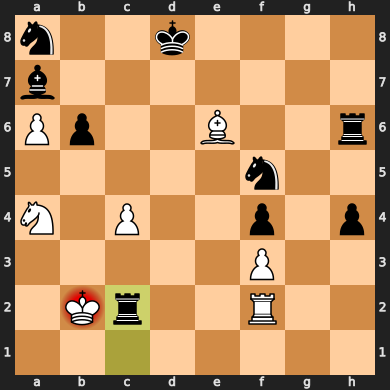

n2k4/b7/Pp2B2r/5n2/N1P2p1p/5P2/1Kr2R2/8 w - - 9 70


In [ ]:
board.reset()
for i in range(np.random.randint(100, 200)):
    legal_moves = list(board.legal_moves)
    board.push(np.random.choice(legal_moves))
    if board.is_checkmate() or board.is_stalemate() or board.is_seventyfive_moves() or board.is_insufficient_material():
        board.reset()

display(board)
print(board.fen())
activations = local_nn.board_activations(board)

In [ ]:
select_epsilon_greedy_action(board, 0)

'b2c2'

In [ ]:
select_worst_action(board)

In [ ]:
action_qz(board)

{'b2a1': 6.008908,
 'b2a3': 5.9656725,
 'b2b1': 6.076829,
 'b2b3': 5.577121,
 'b2c2': 6.3311577,
 'f2c2': 6.2676625}

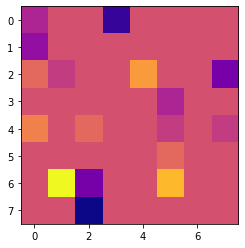

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[0].astype("int16"), cmap='plasma')

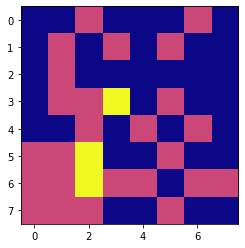

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[1].astype("int16"), cmap='plasma')

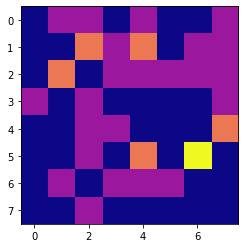

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[2].astype("int16"), cmap='plasma')

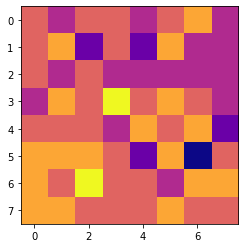

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[3].astype("int16"), cmap='plasma')

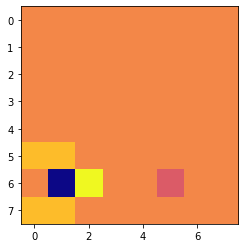

In [ ]:
plt.imshow(board_to_array(board).reshape(inp_shape)[4].astype("int16"), cmap='plasma')

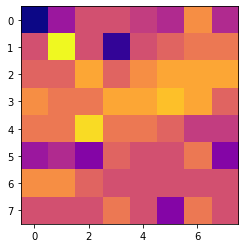

In [ ]:
plt.imshow(np.mean(board_to_array(board)[0].astype("int16"), axis=-1), cmap='plasma')

In [ ]:
fig = plt.figure(figsize=(32,4))
for img in range(32):
    ax = fig.add_subplot(2, 16, img+1)
    ax = plt.imshow(activations[0][0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

In [ ]:
fig = plt.figure(figsize=(32,8))
for img in range(64):
    ax = fig.add_subplot(4, 16, img+1)
    ax = plt.imshow(activations[1][0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

In [ ]:
fig = plt.figure(figsize=(32,16))
for img in range(128):
    ax = fig.add_subplot(8, 16, img+1)
    ax = plt.imshow(activations[2][0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

In [ ]:
fig = plt.figure(figsize=(32,32))
for img in range(256):
    ax = fig.add_subplot(16, 16, img+1)
    ax = plt.imshow(activations[3][0, :, :, img], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

## Can RL Agent Beat Random Agent?

In [ ]:
play_board = chess.Board()
ws = 0
ds = 0
ls = 0

n_games = 25
for i in range(n_games):

    play_board.reset()

    rl_agent_white = bool(np.random.randint(2))

    if rl_agent_white:
        print("\nRL Agent (White) vs Random Agent (Black)")
    else:
        print("\nRL Agent (Black) vs Random Agent (White)")

    if rl_agent_white: 
        while True:
            move = select_epsilon_greedy_action(play_board, 0)
            play_board.push(chess.Move.from_uci(move))
            if play_board.is_checkmate():
                display(play_board)
                print("CHECKMATE! - RL Agent is Victorious!")
                ws += 1
                break
            if play_board.is_stalemate() or play_board.is_seventyfive_moves() or play_board.is_insufficient_material():
                display(play_board)
                print("DRAW!")
                ds += 1
                break

            move = np.random.choice(list(play_board.legal_moves))
            play_board.push(move)
            if play_board.is_checkmate():
                display(play_board)
                print("CHECKMATE! - Random Agent is Victorious!")
                ls += 1
                break
            if play_board.is_stalemate() or play_board.is_seventyfive_moves() or play_board.is_insufficient_material():
                display(play_board)
                print("DRAW!")
                ds += 1
                break

    else: 
        while True:
            move = np.random.choice(list(play_board.legal_moves))
            play_board.push(move)
            if play_board.is_checkmate():
                display(play_board)
                print("CHECKMATE! - Random Agent is Victorious!")
                ls += 1
                break
            if play_board.is_stalemate() or play_board.is_seventyfive_moves() or play_board.is_insufficient_material():
                display(play_board)
                print("DRAW!")
                ds += 1
                break

            move = select_epsilon_greedy_action(play_board, 0)
            play_board.push(chess.Move.from_uci(move))
            if play_board.is_checkmate():
                display(play_board)
                print("CHECKMATE! - RL Agent is Victorious!")
                ws += 1
                break
            if play_board.is_stalemate() or play_board.is_seventyfive_moves() or play_board.is_insufficient_material():
                display(play_board)
                print("DRAW!")
                ds += 1
                break

print("\n"+str(n_games), "games played")
print("wdl:", ws, "-", ds, "-", ls, "-")

## Play Against Stockfish #1

In [ ]:
def play_white_stockfish():

    play_board = chess.Board()
    display(play_board)

    num_moves = 1
    while not play_board.is_checkmate() or play_board.is_stalemate() or play_board.is_seventyfive_moves() or play_board.is_insufficient_material():

        print("pick a move:")
        move = str(input())

        while move not in [str(x) for x in list(play_board.legal_moves)]:
            print("move invalid:")
            move = str(input())
        
        #clear_output()
        play_board.push(chess.Move.from_uci(move))
        display(play_board)

        if play_board.is_checkmate() or play_board.is_stalemate() or play_board.is_seventyfive_moves() or play_board.is_insufficient_material():
            break

        move = select_stockfish_action_op(play_board, num_moves, 0.05)
        num_moves += 2

        print("chessAI picked:", move)
                
        #clear_output()
        play_board.push(chess.Move.from_uci(move))
        display(play_board)

        if play_board.is_checkmate() or play_board.is_stalemate() or play_board.is_seventyfive_moves() or play_board.is_insufficient_material():
            break

    print("CHECKMATE")

def play_black_stockfish():

    play_board = chess.Board()
    display(play_board)

    num_moves = 0
    while True:

        move = select_stockfish_action_op(play_board, num_moves, 0.05)
        num_moves += 2

        print("chessAI picked:", move)
                
        #clear_output()
        play_board.push(chess.Move.from_uci(move))
        display(play_board)

        if play_board.is_checkmate() or play_board.is_stalemate() or play_board.is_seventyfive_moves() or play_board.is_insufficient_material():
            break

        print("pick a move:")
        move = str(input())

        while move not in [str(x) for x in list(play_board.legal_moves)]:
            print("move invalid:")
            move = str(input())

        #clear_output()
        play_board.push(chess.Move.from_uci(move))
        display(play_board)

        if play_board.is_checkmate() or play_board.is_stalemate() or play_board.is_seventyfive_moves() or play_board.is_insufficient_material():
            break

    print("CHECKMATE")

def play_stockfish():

    engine.set_skill(stockfish)

    print("what color would you like to play as? (white/w/black/b)")
    play_color = str(input())

    while play_color not in ["white", "w", "black", "b"]:
        print("invalid color - what color would you like to play as? (white/w/black/b)")
        play_color = str(input())

    if play_color == "white" or "w":
        play_white_stockfish()
    else:
        play_black_stockfish()

In [ ]:
play_stockfish() 

## Play Against ChessAI

In [ ]:
play_board = chess.Board()

def play_white():

    play_board.reset()
    display(play_board)

    while True:

        print("pick a move:")
        move = str(input())

        while move not in [str(x) for x in list(play_board.legal_moves)]:
            print("move invalid \npick a move:")
            move = str(input())
        
        #clear_output()
        play_board.push(chess.Move.from_uci(move))
        display(play_board)

        if play_board.is_checkmate() or play_board.is_stalemate() or play_board.is_seventyfive_moves() or play_board.is_insufficient_material():
            break

        move = select_epsilon_greedy_action(play_board, 0)

        print("chessAI picked:", move)
                
        #clear_output()
        play_board.push(chess.Move.from_uci(move))
        display(play_board)

        if play_board.is_checkmate() or play_board.is_stalemate() or play_board.is_seventyfive_moves() or play_board.is_insufficient_material():
            break

    print("GAME OVER")

def play_black():

    play_board.reset()
    display(play_board)

    while True:

        move = select_epsilon_greedy_action(play_board, 0)

        print("chessAI picked:", move)
                
        #clear_output()
        play_board.push(chess.Move.from_uci(move))
        display(play_board)

        if play_board.is_checkmate() or play_board.is_stalemate() or play_board.is_seventyfive_moves() or play_board.is_insufficient_material():
            break

        print("pick a move:")
        move = str(input())

        while move not in [str(x) for x in list(play_board.legal_moves)]:
            print("move invalid \npick a move:")
            move = str(input())

        #clear_output()
        play_board.push(chess.Move.from_uci(move))
        display(play_board)

        if play_board.is_checkmate() or play_board.is_stalemate() or play_board.is_seventyfive_moves() or play_board.is_insufficient_material():
            break

    print("GAME OVER")

def play():

    print("what color would you like to play as? (white/w/black/b)")
    play_color = str(input())

    while play_color not in ["white", "w", "black", "b"]:
        print("invalid color \nwhat color would you like to play as? (white/w/black/b)")
        play_color = str(input())

    if play_color == "white" or "w":
        play_white()
    else:
        play_black()

In [ ]:
play()